### 1. Clean Parquet data from Kaggle (integer dtypes parquet)
- This notebook aims to further clean the data taken from Kaggle's user, without affecting data quality

In [148]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import matplotlib.pyplot as plt
import gc
import numpy as np
import os
import sys
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS, ROUND_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.constants import (
    PROCESSED_DATA_PATH
)

In [4]:
RAW_DATA_PATH = "../raw_data"
PROCESSED_DATA_PATH = "../processed_data"
SUBMISSION_DATA_PATH = "../submissions"
EVALUATION_DATA_PATH = "../evaluation_data"
MODELS_PATH = "../models"

In [5]:
RAW_TRAIN_PARQUET_PATH = os.path.join(RAW_DATA_PATH, "train_parquet")
RAW_TRAIN_PICKLE_PATH = os.path.join(RAW_DATA_PATH, "train_pickle")
RAW_TEST_PARQUET_PATH = os.path.join(RAW_DATA_PATH, "test_parquet")
RAW_TEST_PICKLE_PATH = os.path.join(RAW_DATA_PATH, "test_pickle")

In [6]:
%load_ext autoreload
%autoreload

In [7]:
def split_float(x, thr, greater_than_thr=None):
    if greater_than_thr is None:
        greater_than_thr = x
    if x != x:
        return np.nan
    elif x >= thr:
        return greater_than_thr
    else:
        return 0

### Read Data

In [9]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/train.parquet", replace_negative_one=True)
test = read_file(f"{RAW_TEST_PARQUET_PATH}/test.parquet", replace_negative_one=True)

Shape of data: (5531451, 190)
Shape of data: (11363762, 190)
CPU times: user 14.7 s, sys: 18.9 s, total: 33.6 s
Wall time: 24.1 s


In [10]:
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")

In [11]:
%%time
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 1.44 s, sys: 3.15 s, total: 4.59 s
Wall time: 7.81 s


In [12]:
# train.loc[train["B_1_"] < -0.03, "target"].mean()

### B_1

0 null count, 0.000 null proportion
nan of the targets have label = 1


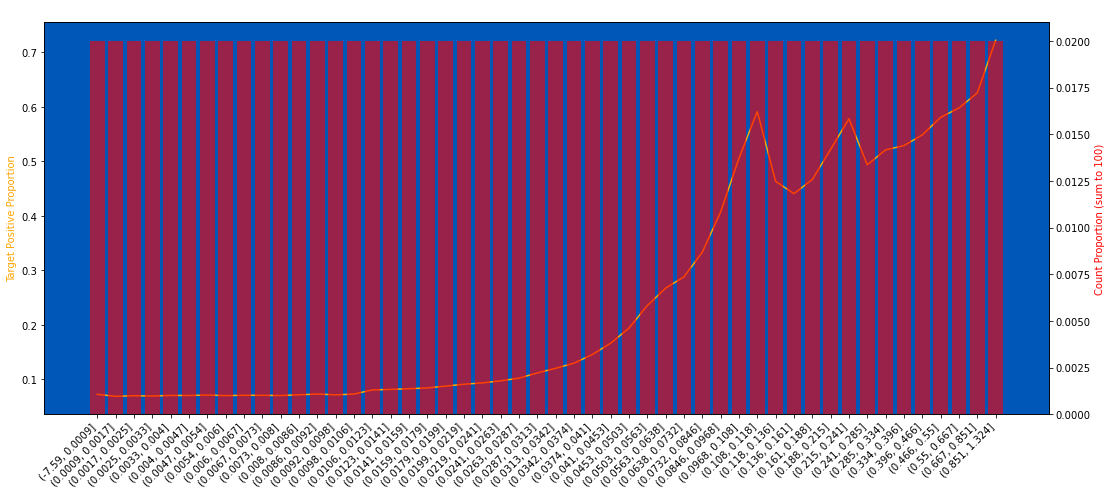

In [13]:
plot_target_check(train, "B_1", q=50, use_raw_bin=True)

In [14]:
train["B_1"] = train["B_1"].round(2)
test["B_1"] = test["B_1"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


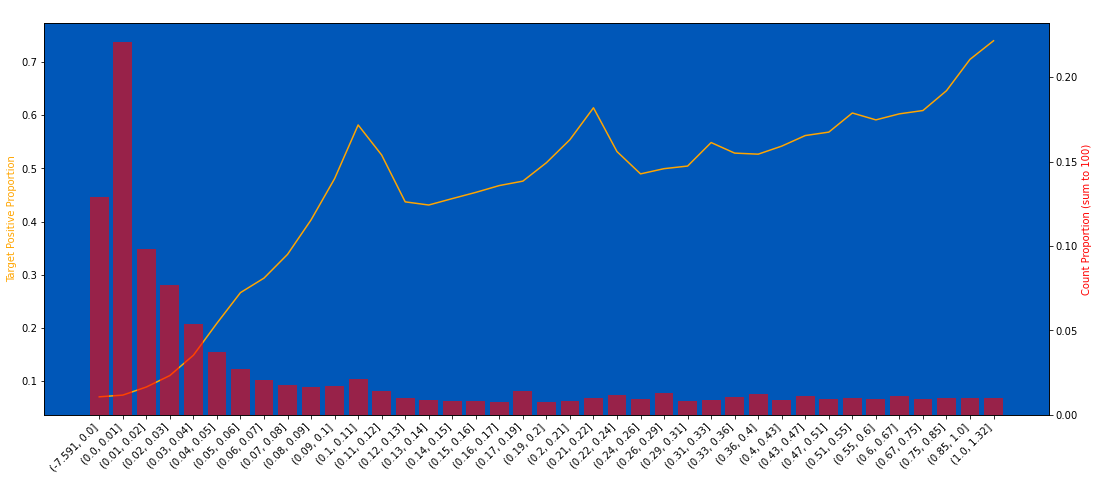

In [15]:
plot_target_check(train, "B_1", q=100, use_raw_bin=True)

### B_2

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


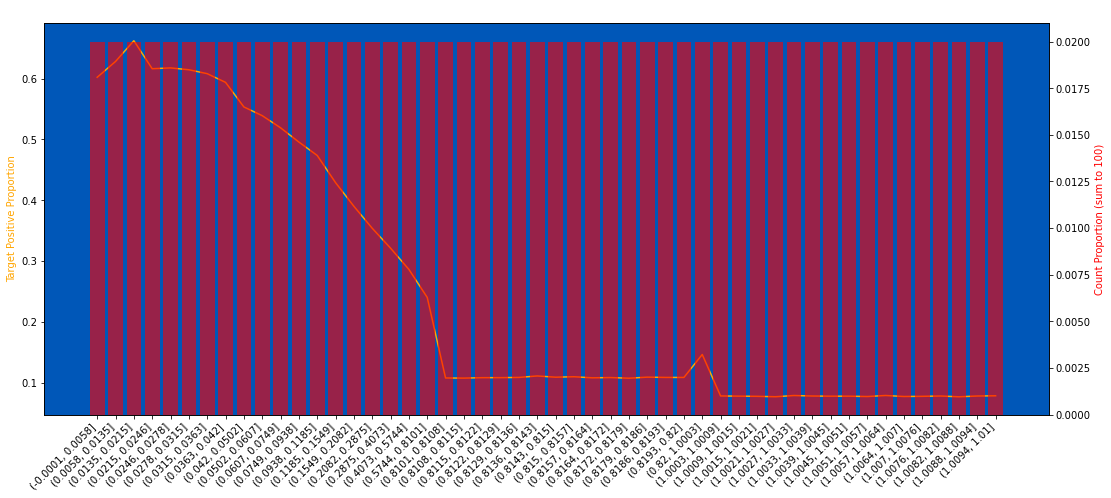

In [16]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True)

In [17]:
train["B_2"] = train["B_2"].round(2)
test["B_2"] = test["B_2"].round(2)

In [18]:
train.loc[train["B_2"].between(1, 1.01), "B_2"] = 1
test.loc[test["B_2"].between(1, 1.01), "B_2"] = 1

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


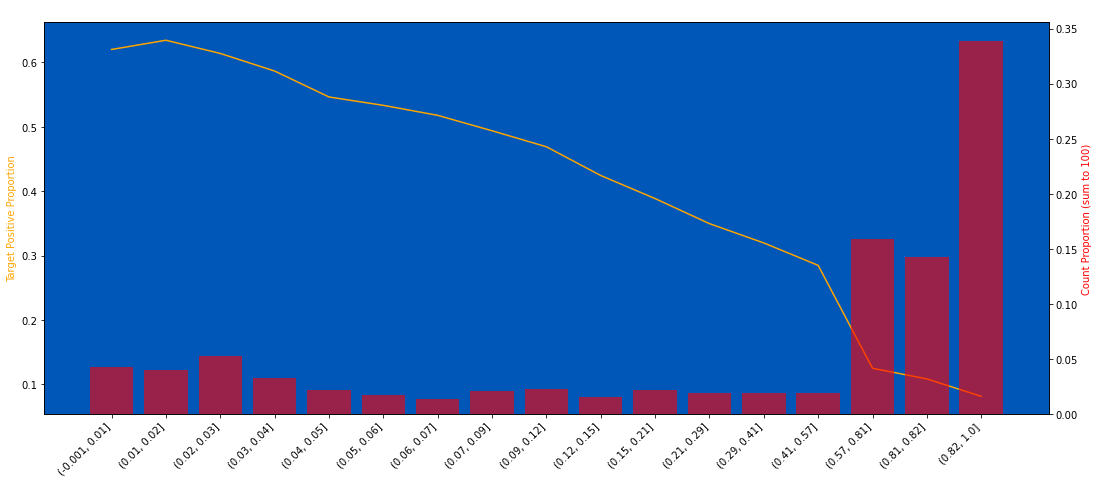

In [19]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True)

### B_3

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


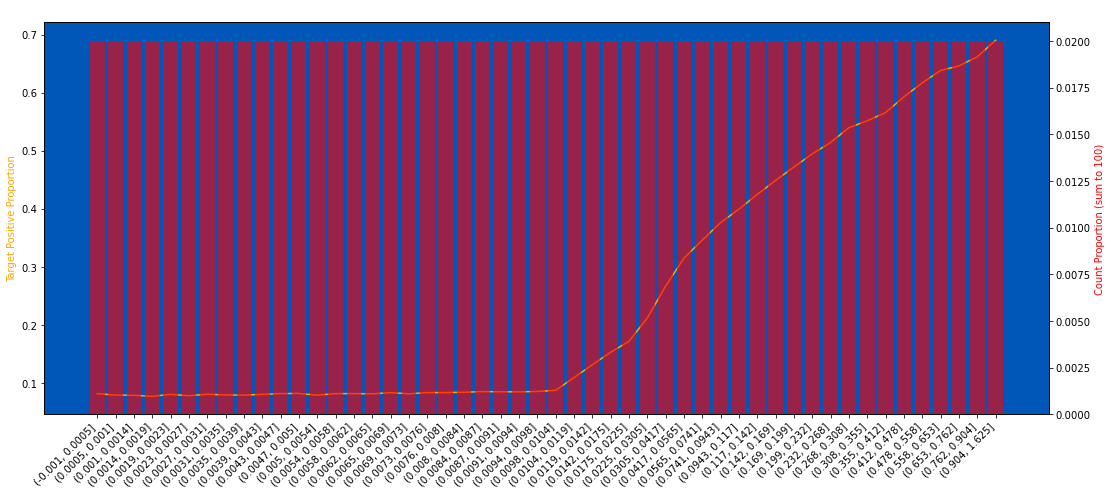

In [20]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True)

In [21]:
train["B_3"] = train["B_3"].round(2)
test["B_3"] = test["B_3"].round(2)

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


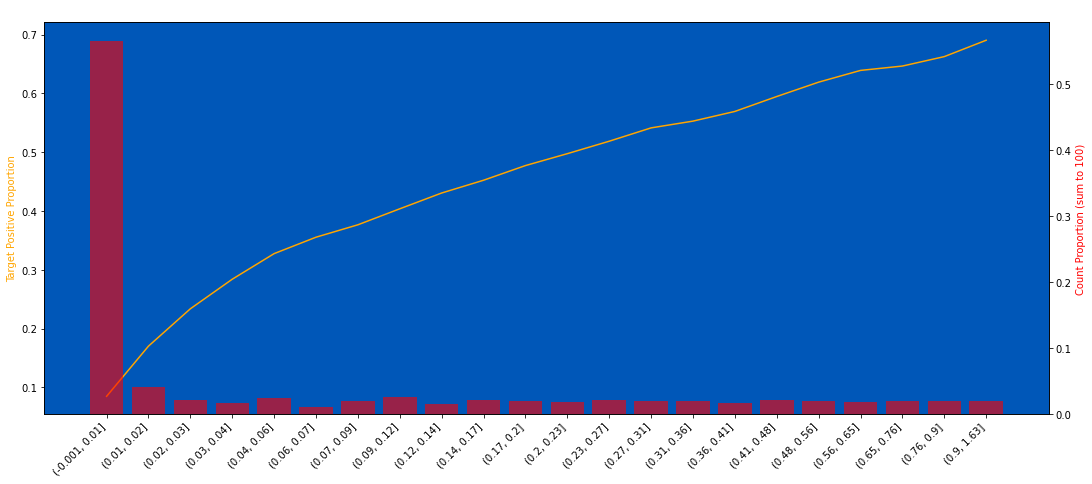

In [22]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True)

### B_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


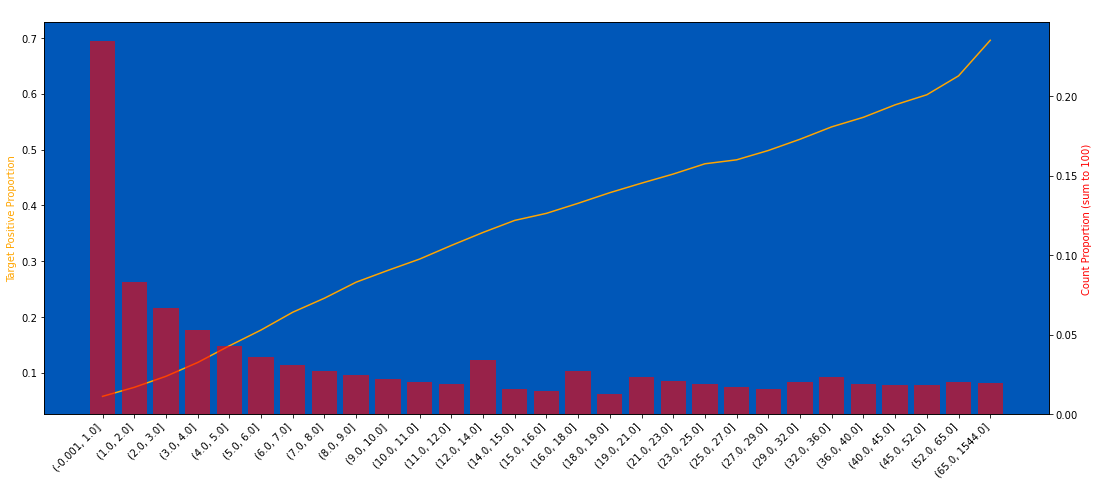

In [23]:
plot_target_check(train, "B_4", q=50, use_raw_bin=True)

### B_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


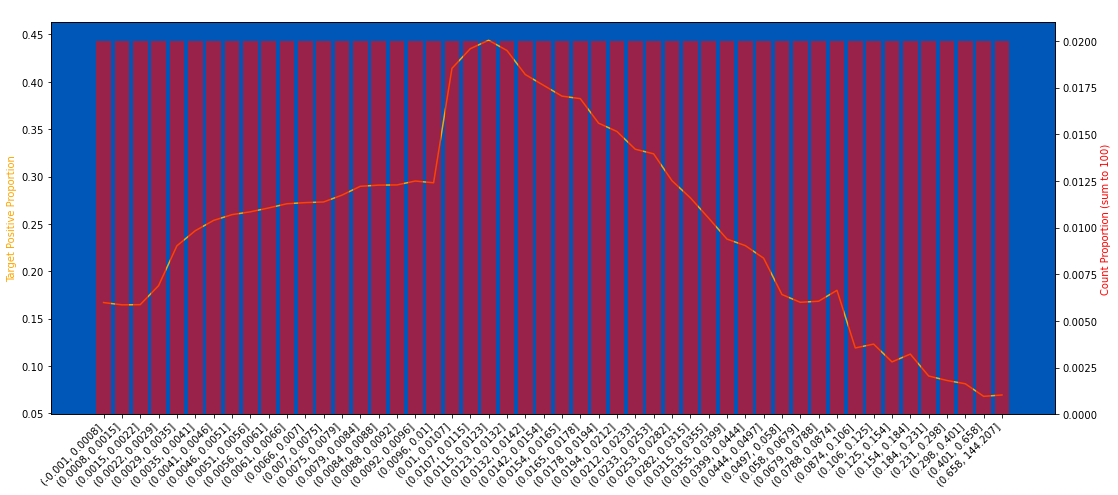

In [24]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True)

In [25]:
train["B_5"] = train["B_5"].round(3)
test["B_5"] = test["B_5"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


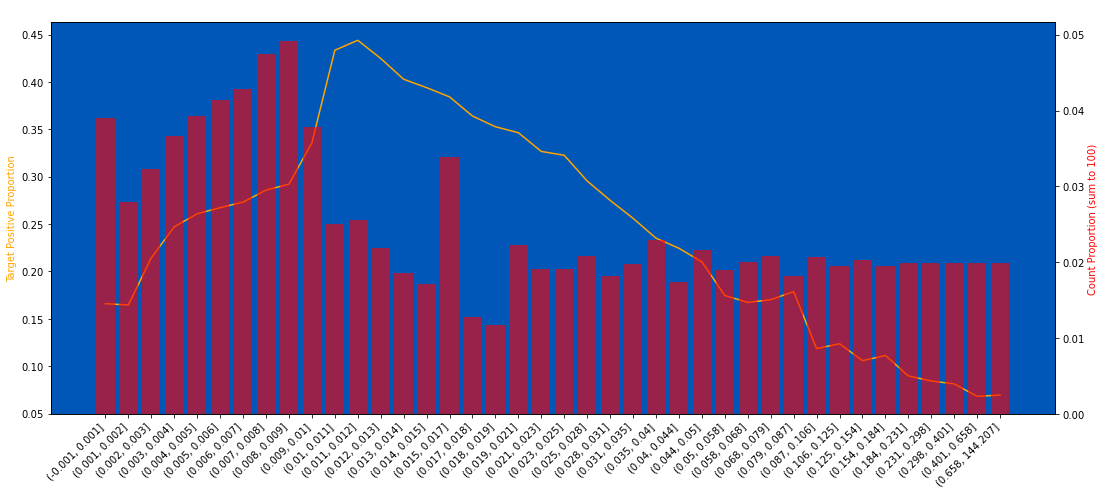

In [26]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True)

### B_6

233 null count, 0.000 null proportion
0.2532 of the targets have label = 1


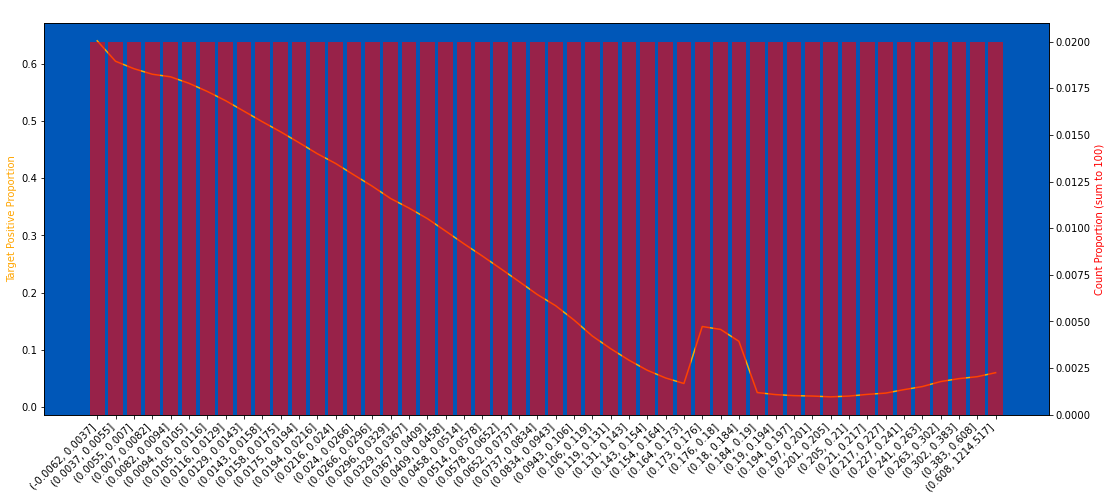

In [27]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True)

In [28]:
train["B_6"] = train["B_6"].round(3)
test["B_6"] = test["B_6"].round(3)

233 null count, 0.000 null proportion
0.2532 of the targets have label = 1


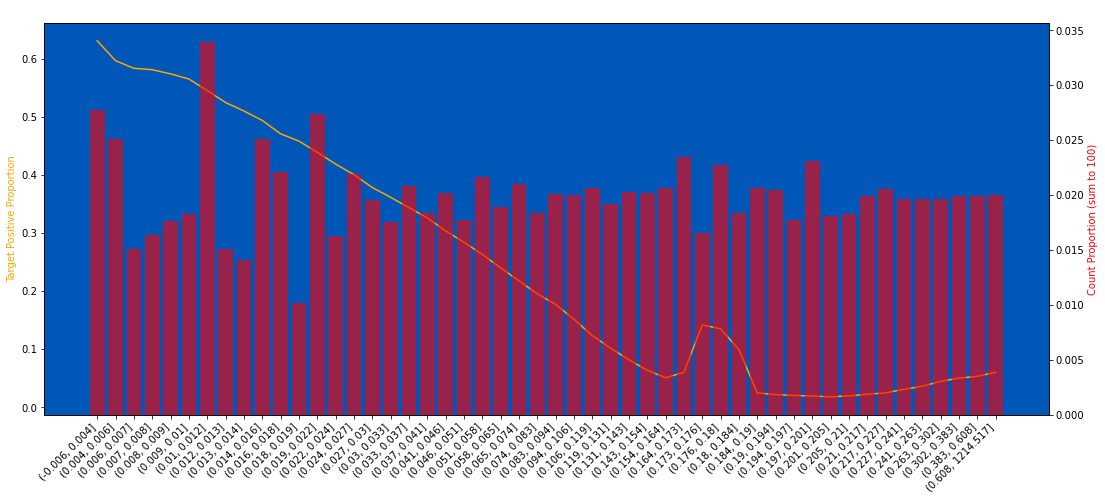

In [29]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True)

### B_7

0 null count, 0.000 null proportion
nan of the targets have label = 1


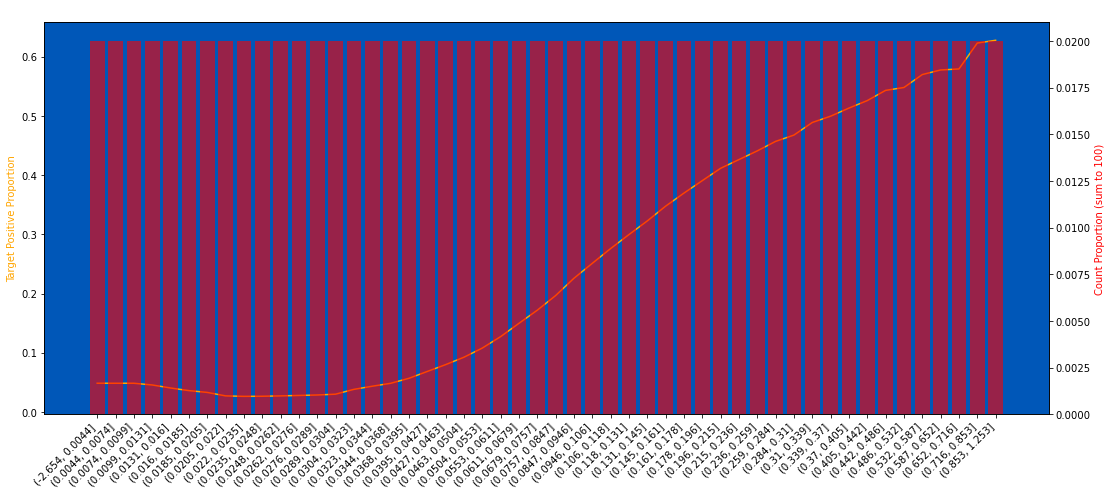

In [30]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True)

In [31]:
train["B_7"] = train["B_7"].round(2)
test["B_7"] = test["B_7"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


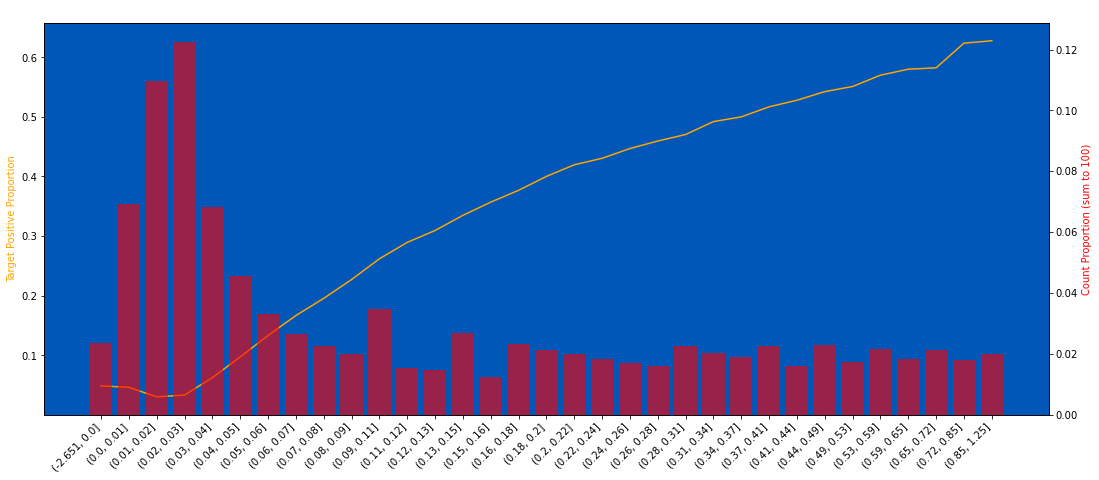

In [32]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True)

### B_8

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1


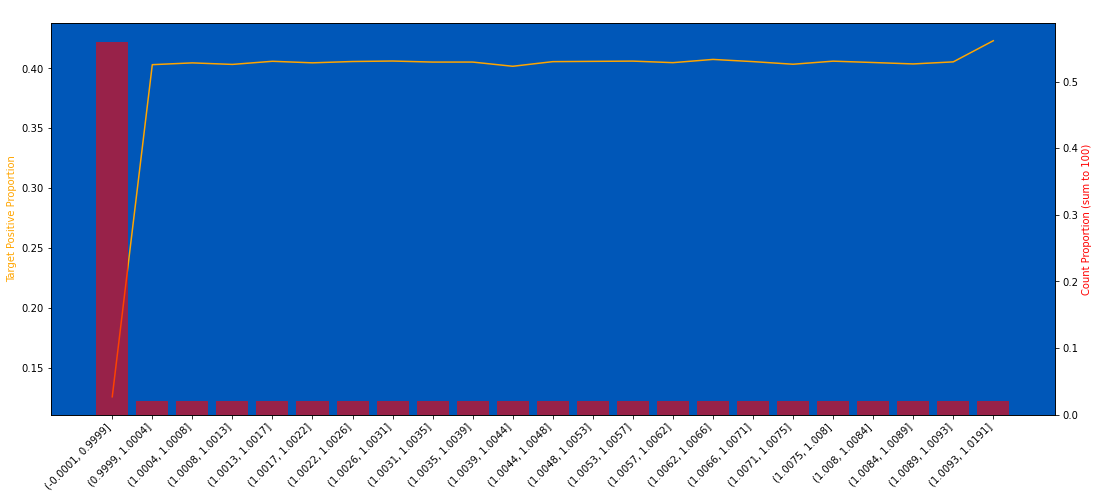

In [33]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

In [34]:
train["B_8"] = train["B_8"].round(1)
test["B_8"] = test["B_8"].round(1)

In [142]:
train.groupby(["B_8"])["target"].mean()

B_8
0.0000   0.1233
1.0000   0.4050
Name: target, dtype: float64

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1


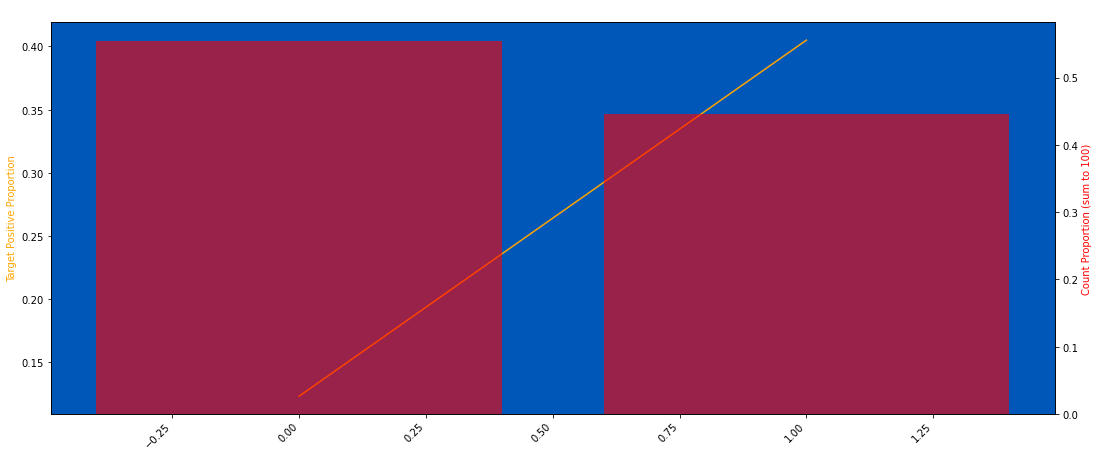

In [143]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

### B_9

0 null count, 0.000 null proportion
nan of the targets have label = 1


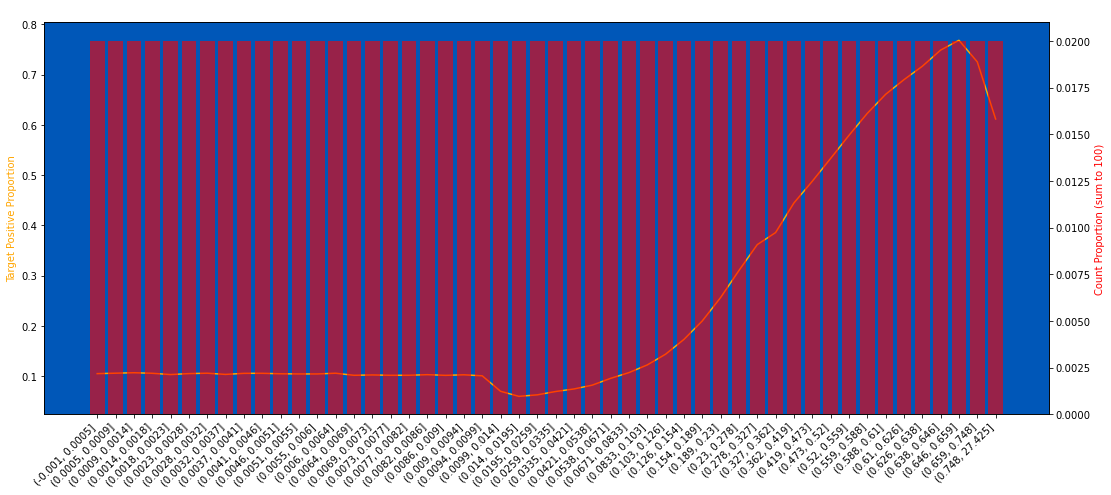

In [38]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True)

In [39]:
train["B_9"] = train["B_9"].round(2)
test["B_9"] = test["B_9"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


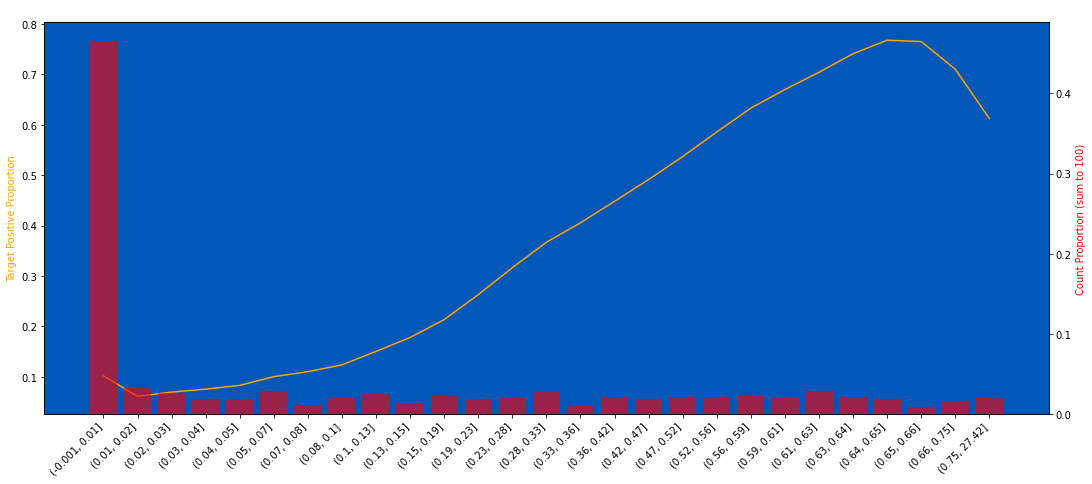

In [40]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True)

### B_10

0 null count, 0.000 null proportion
nan of the targets have label = 1


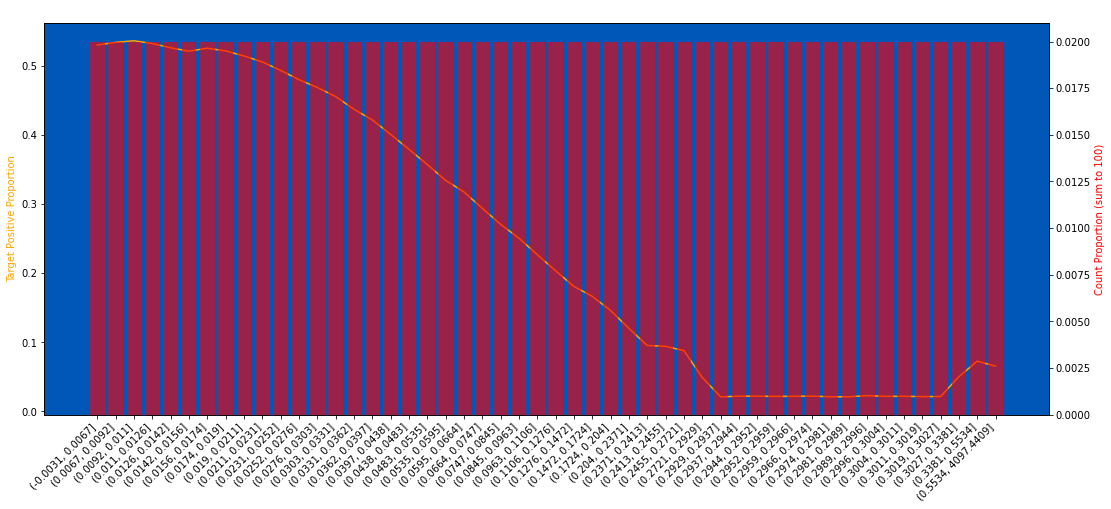

In [41]:
plot_target_check(train, "B_10", q=50, use_raw_bin=True)

In [42]:
train["B_10"] = train["B_10"].round(2)
test["B_10"] = test["B_10"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


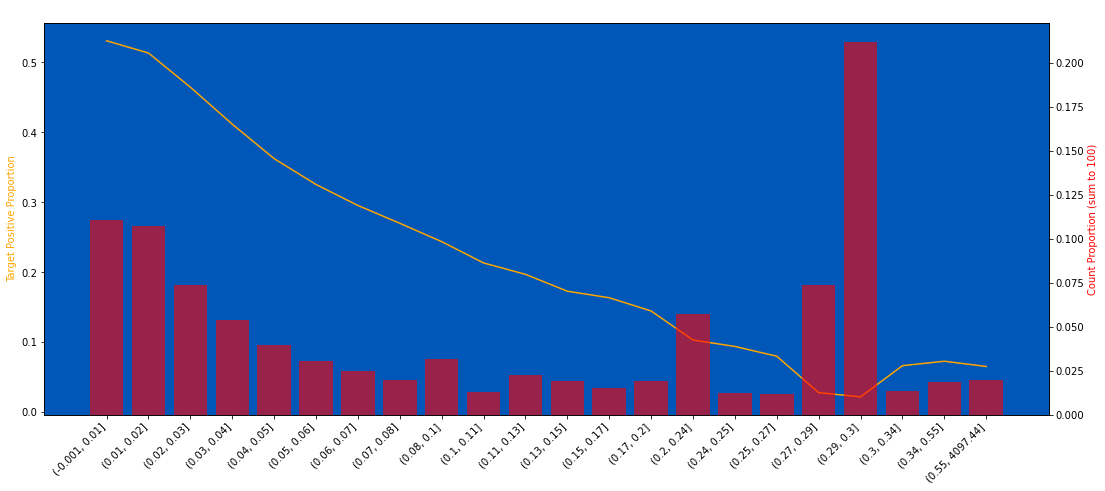

In [43]:
plot_target_check(train, "B_10", q=50, use_raw_bin=True)

### B_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


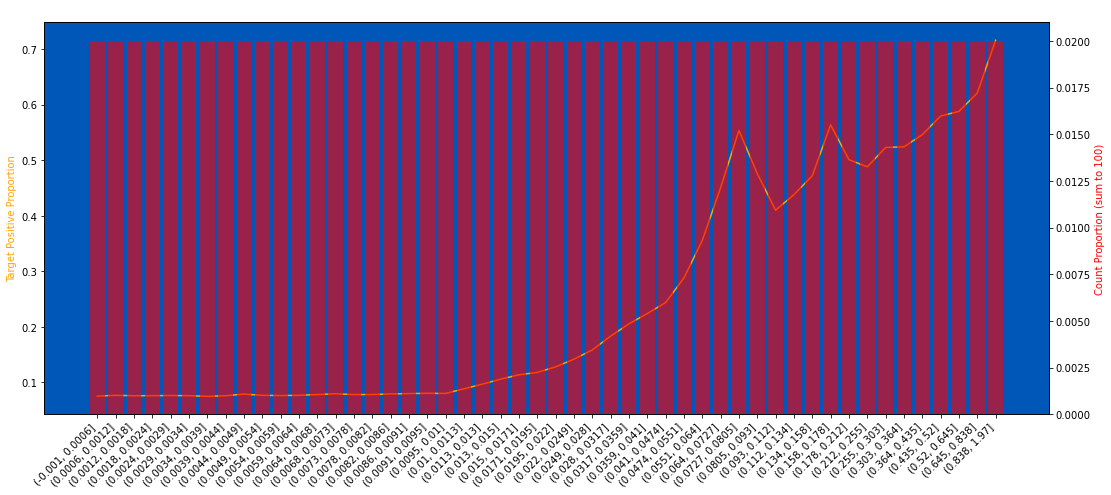

In [44]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True)

In [45]:
train["B_11"] = train["B_11"].round(2)
test["B_11"] = test["B_11"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


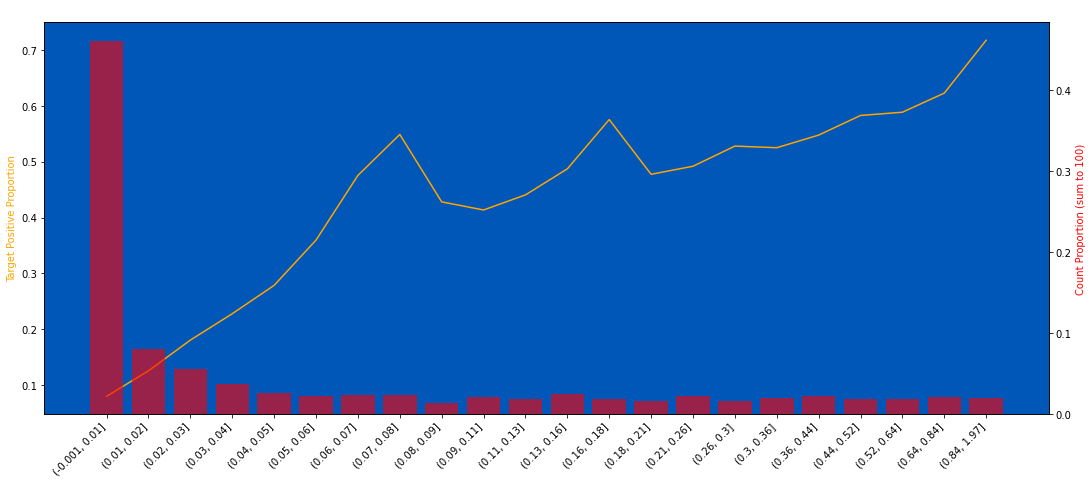

In [46]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True)

### B_12

0 null count, 0.000 null proportion
nan of the targets have label = 1


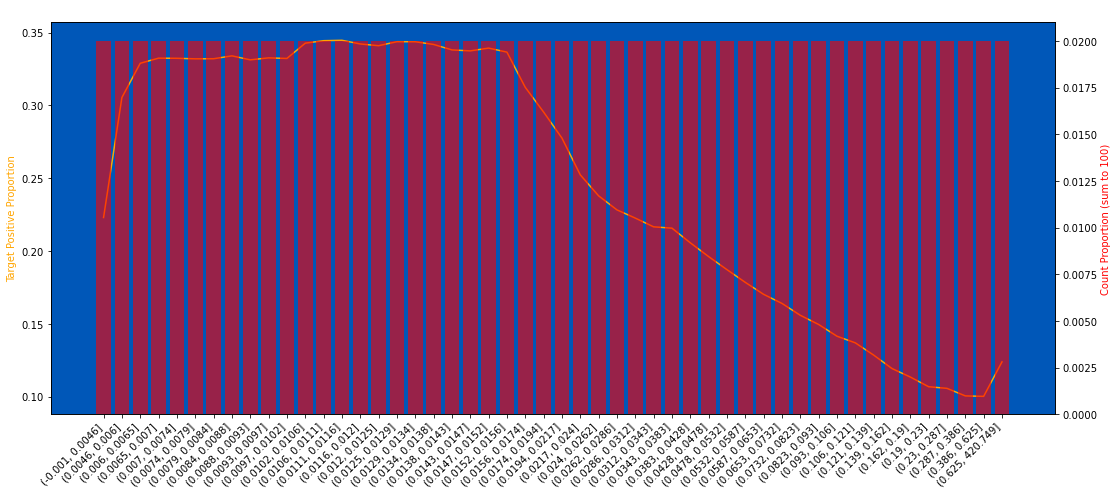

In [47]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True)

In [48]:
train["B_12"] = train["B_12"].round(3)
test["B_12"] = test["B_12"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


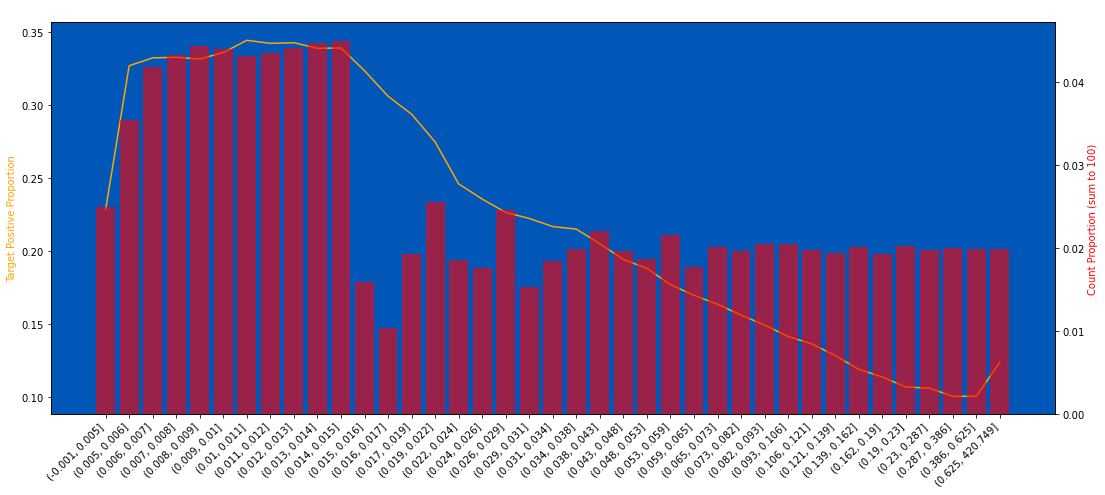

In [49]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True)

### B_13

49519 null count, 0.009 null proportion
0.4906 of the targets have label = 1


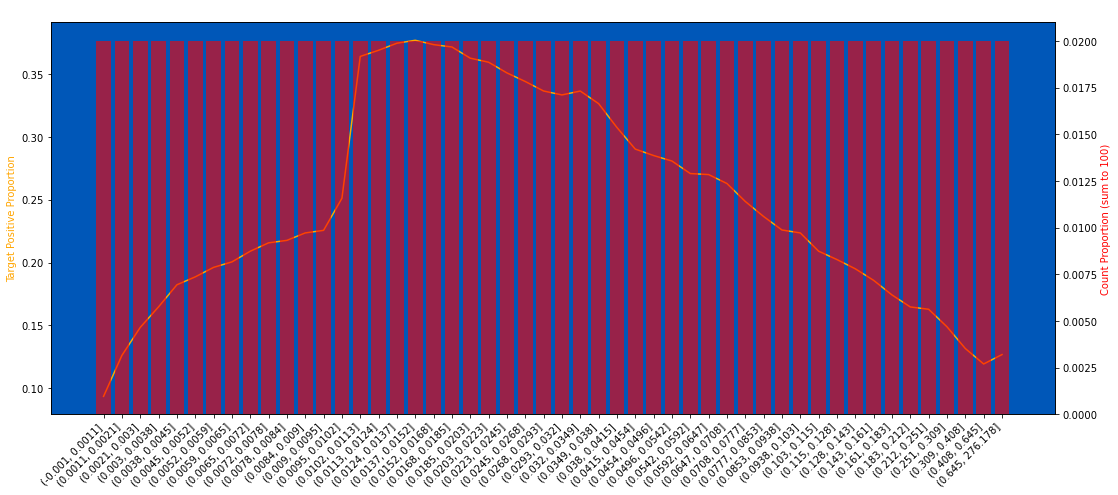

In [50]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True)

In [51]:
train["B_13"] = train["B_13"].round(3)
test["B_13"] = test["B_13"].round(3)

49519 null count, 0.009 null proportion
0.4906 of the targets have label = 1


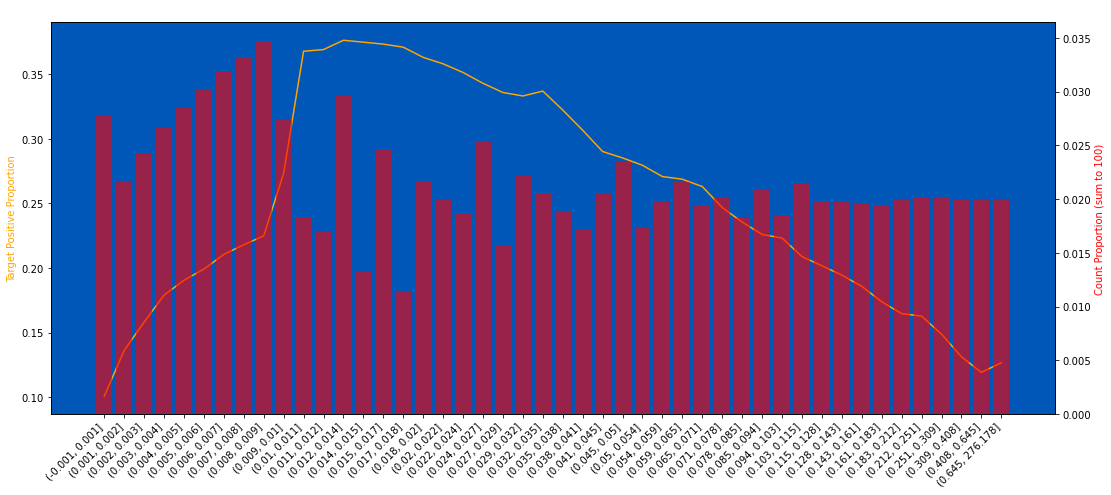

In [52]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True)

### B_14

0 null count, 0.000 null proportion
nan of the targets have label = 1


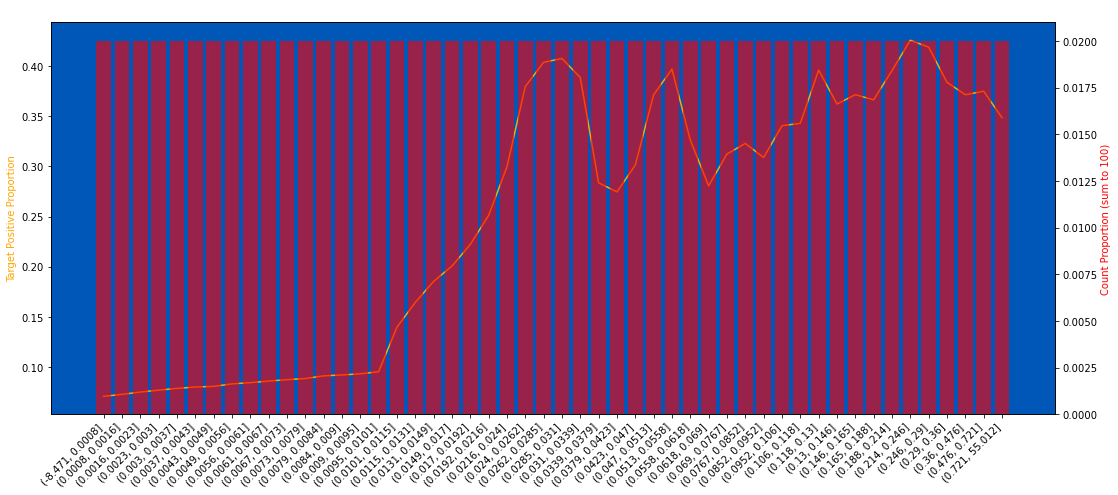

In [53]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True)

In [54]:
train.loc[train["B_14"].between(0, 0.0101), "B_14"] = 0.01
test.loc[test["B_14"].between(0, 0.0101), "B_14"] = 0.01

In [55]:
train["B_14"] = train["B_14"].round(3)
test["B_14"] = test["B_14"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


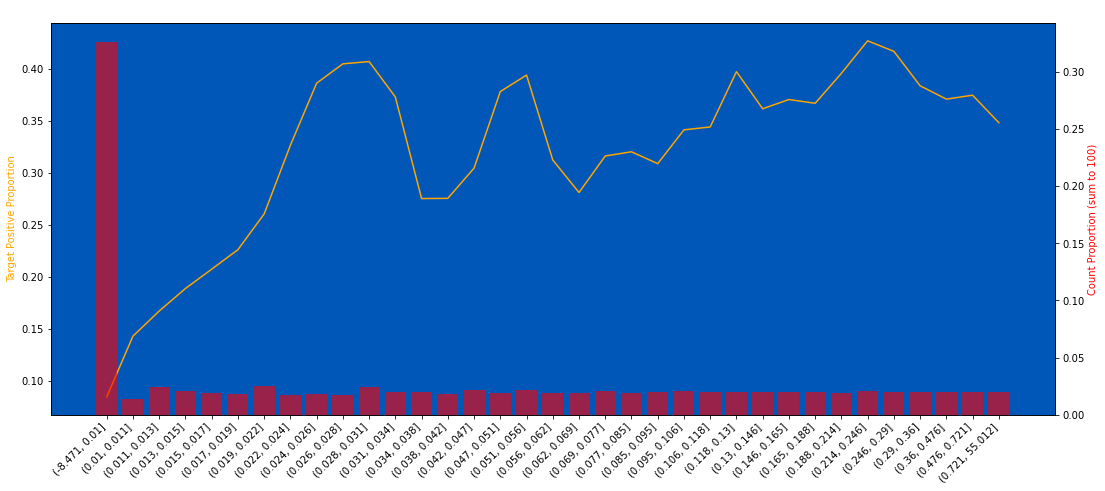

In [56]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True)

### B_15

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


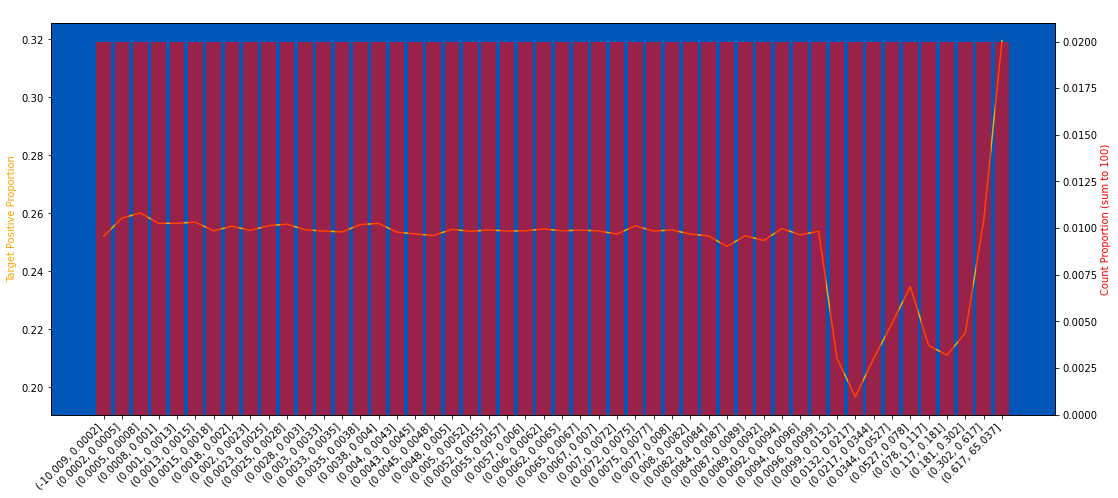

In [57]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True)

In [58]:
train["B_15"] = train["B_15"].round(3)
test["B_15"] = test["B_15"].round(3)

In [59]:
train.loc[train["B_15"].between(0, 0.0101), "B_15"] = 0.01
test.loc[test["B_15"].between(0, 0.0101), "B_15"] = 0.01

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


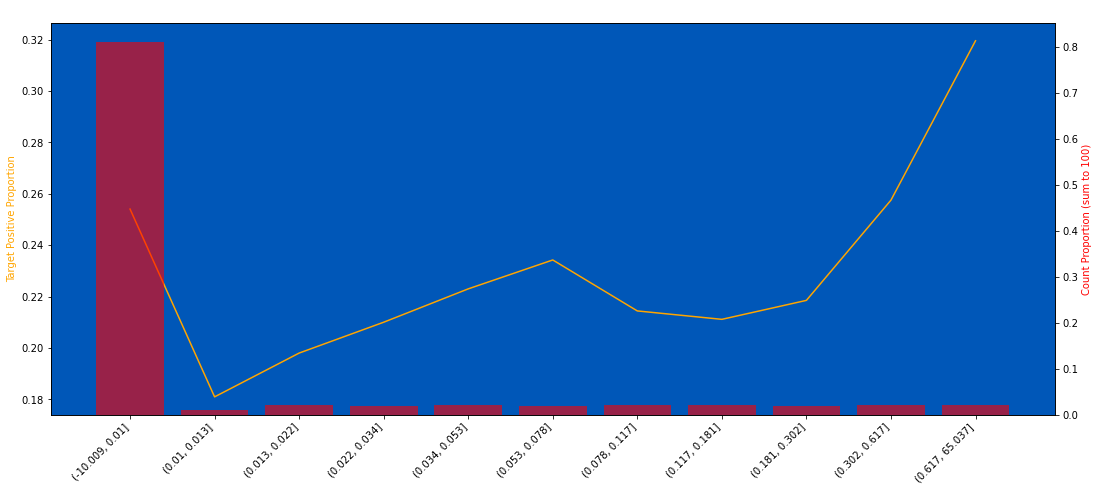

In [60]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True)

### B_16

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


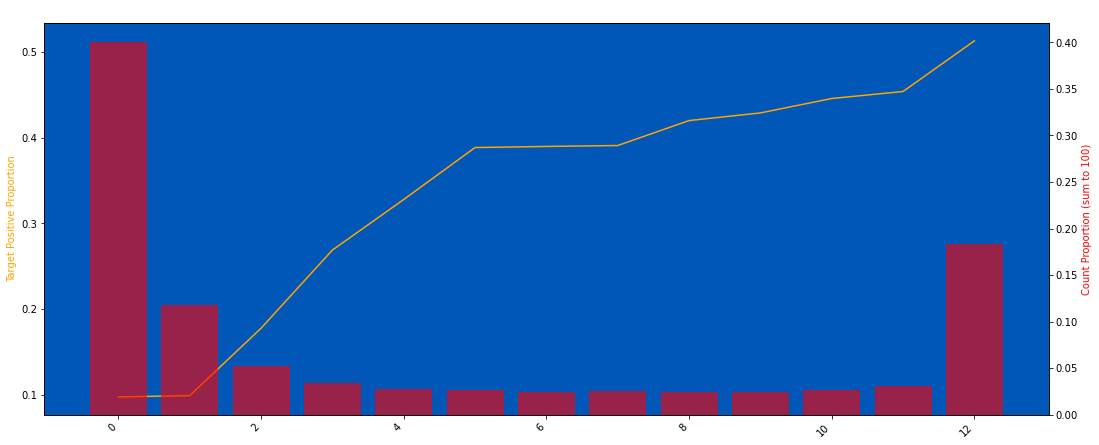

In [61]:
plot_target_check(train, "B_16", q=50, use_raw_bin=True)

### B_17

3137598 null count, 0.567 null proportion
0.1226 of the targets have label = 1


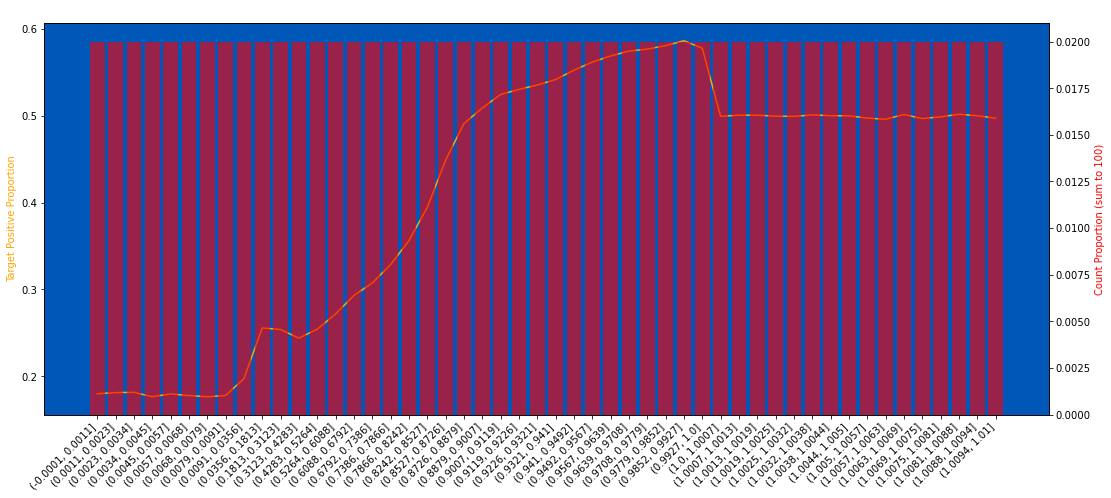

In [62]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True)

In [63]:
train["B_17"] = train["B_17"].round(3)
test["B_17"] = test["B_17"].round(3)

In [64]:
train.loc[train["B_17"].between(-1, 0.01), "B_17"] = 0.01
test.loc[test["B_17"].between(-1, 0.01), "B_17"] = 0.01

In [65]:
train.loc[train["B_17"].between(1, 1.01), "B_17"] = 1
test.loc[test["B_17"].between(1, 1.01), "B_17"] = 1

3137598 null count, 0.567 null proportion
0.1226 of the targets have label = 1


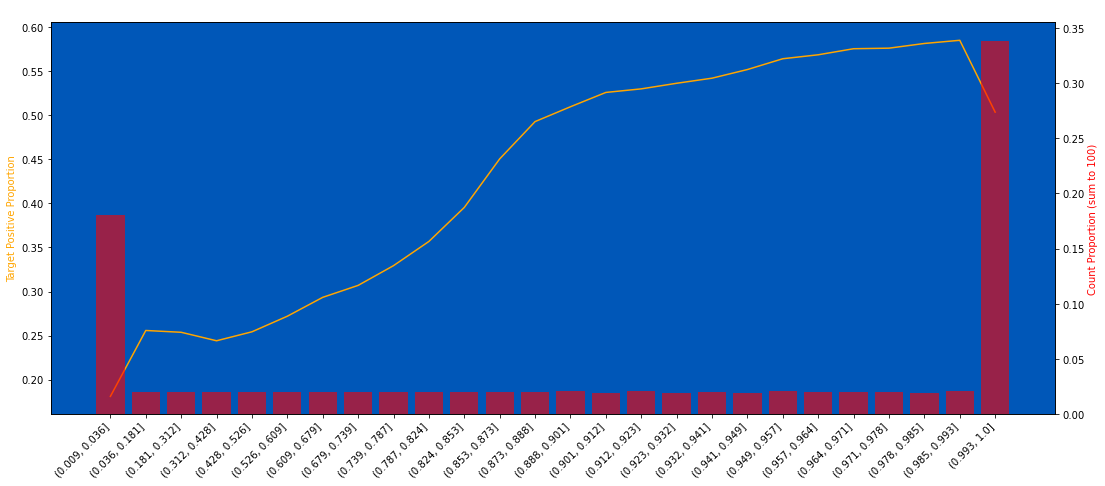

In [66]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True)

### B_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


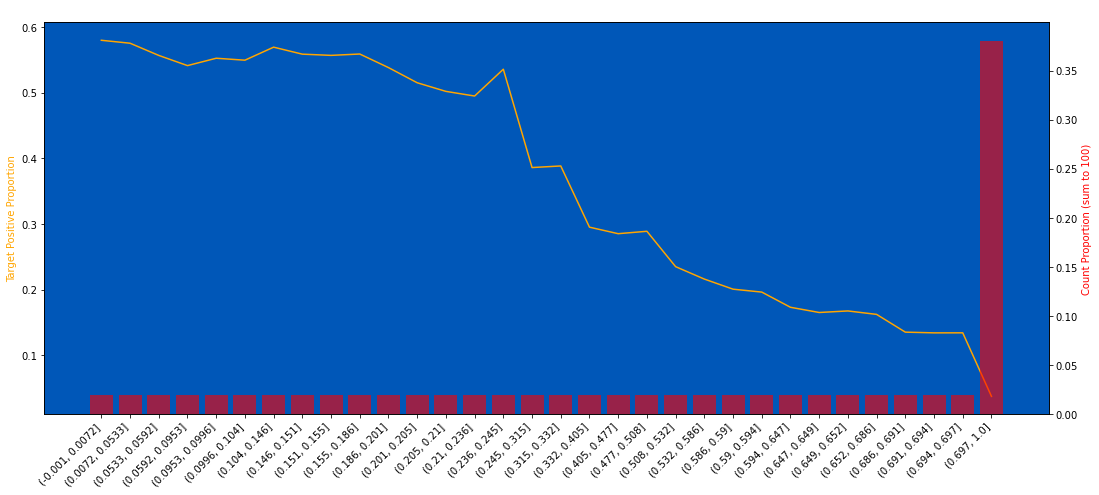

In [67]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True)

In [68]:
train["B_18"] = train["B_18"].round(3)
test["B_18"] = test["B_18"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


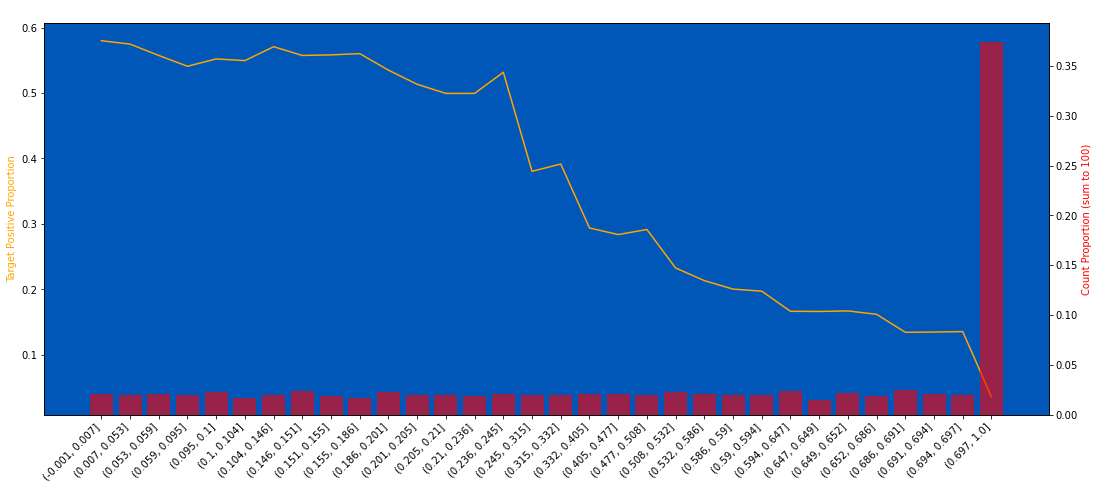

In [69]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True)

### B_19

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


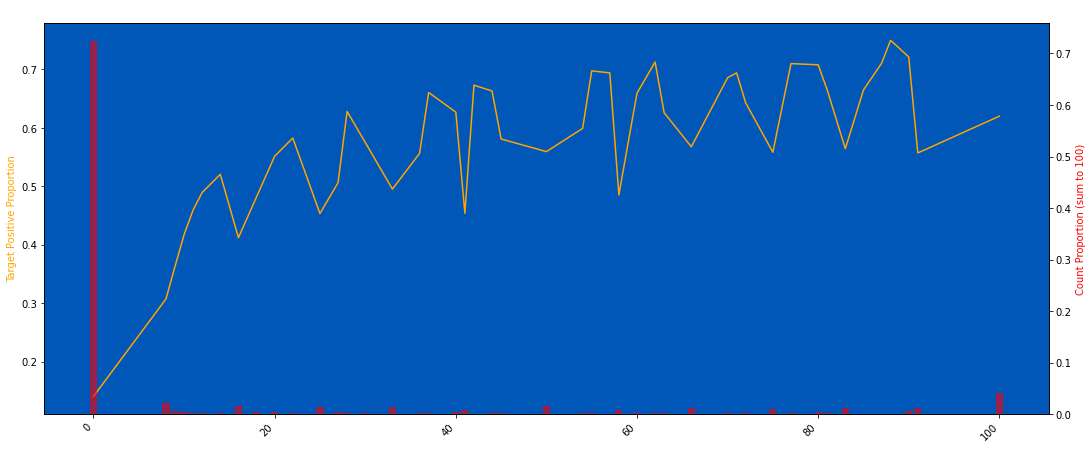

In [70]:
plot_target_check(train, "B_19", q=50, use_raw_bin=True)

### B_20

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


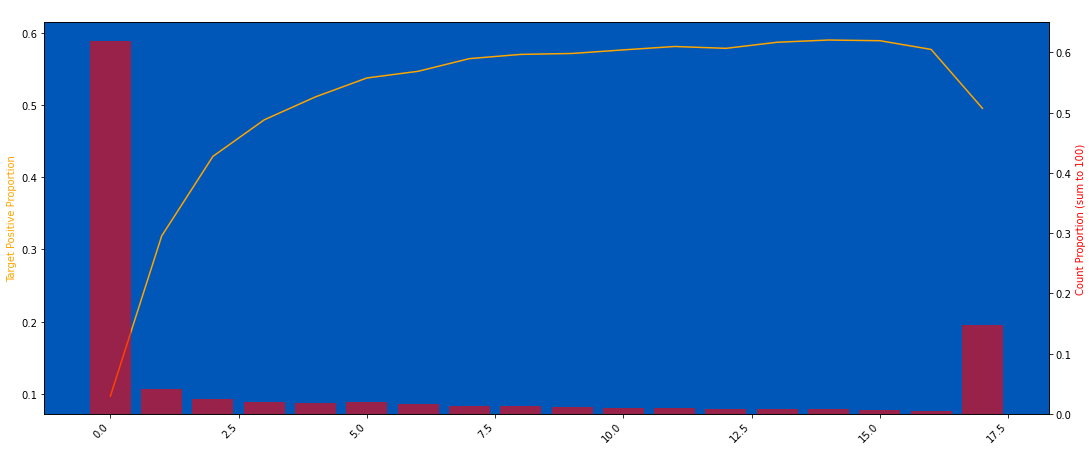

In [71]:
plot_target_check(train, "B_20", q=50, use_raw_bin=True)

### B_21

0 null count, 0.000 null proportion
nan of the targets have label = 1


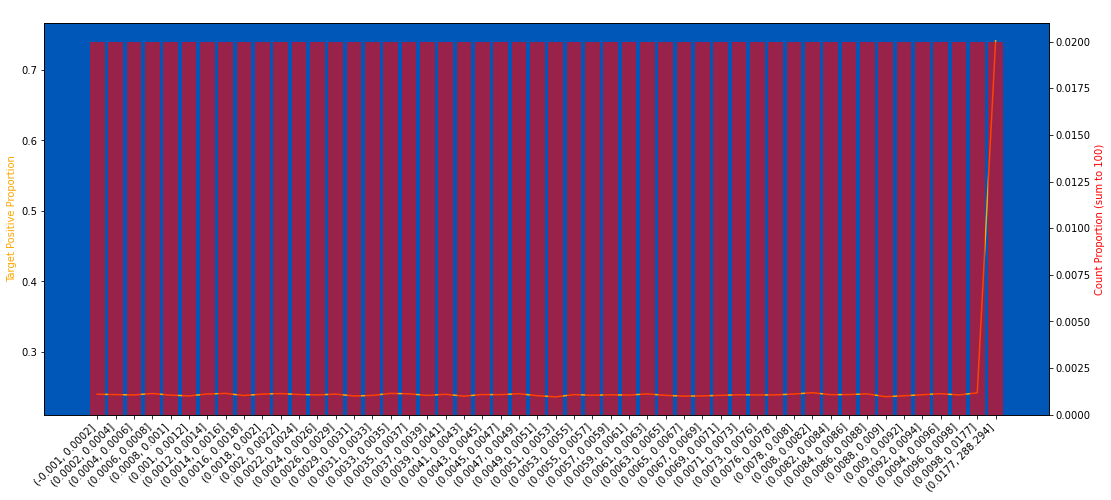

In [72]:
plot_target_check(train, "B_21", q=50, use_raw_bin=True)

In [73]:
train["B_21"] = train["B_21"].round(2)
test["B_21"] = test["B_21"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


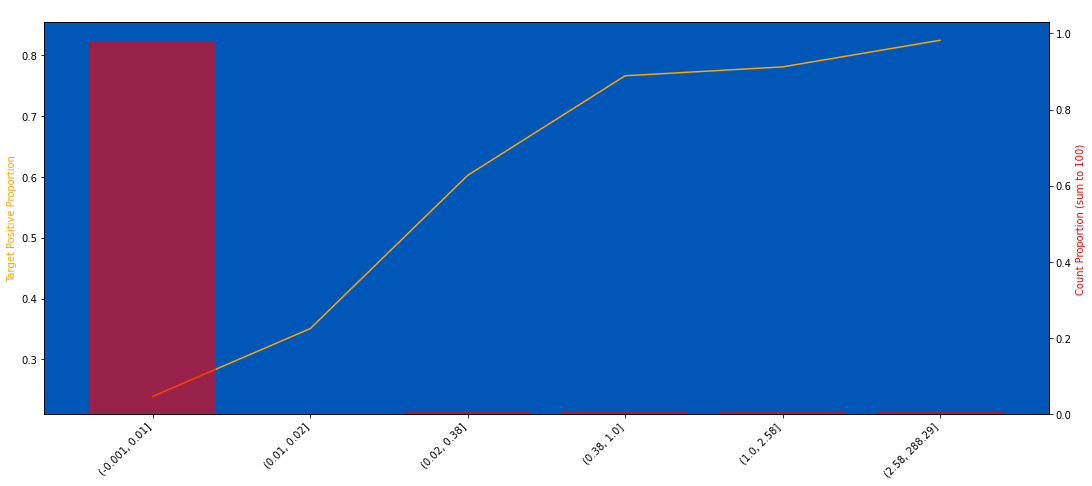

In [74]:
plot_target_check(train, "B_21", q=200, use_raw_bin=True)

### B_22

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


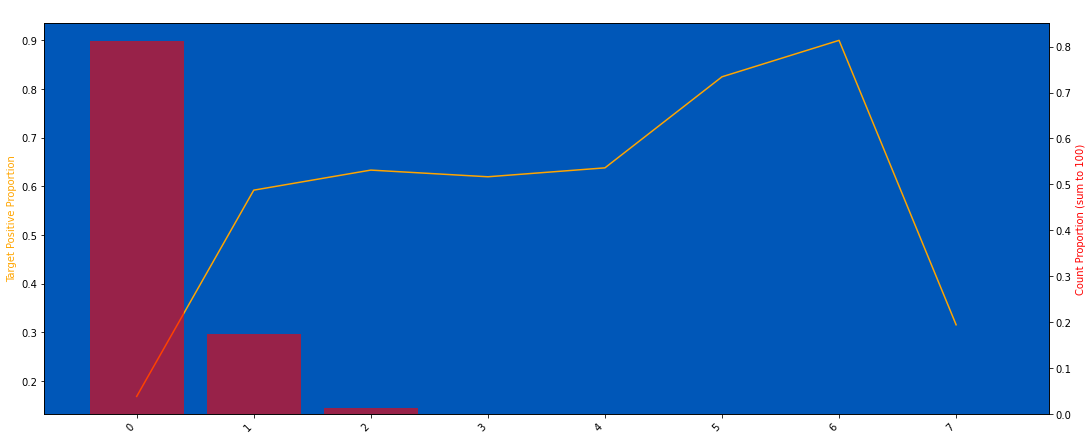

In [75]:
plot_target_check(train, "B_22", q=50, use_raw_bin=True)

### B_23

0 null count, 0.000 null proportion
nan of the targets have label = 1


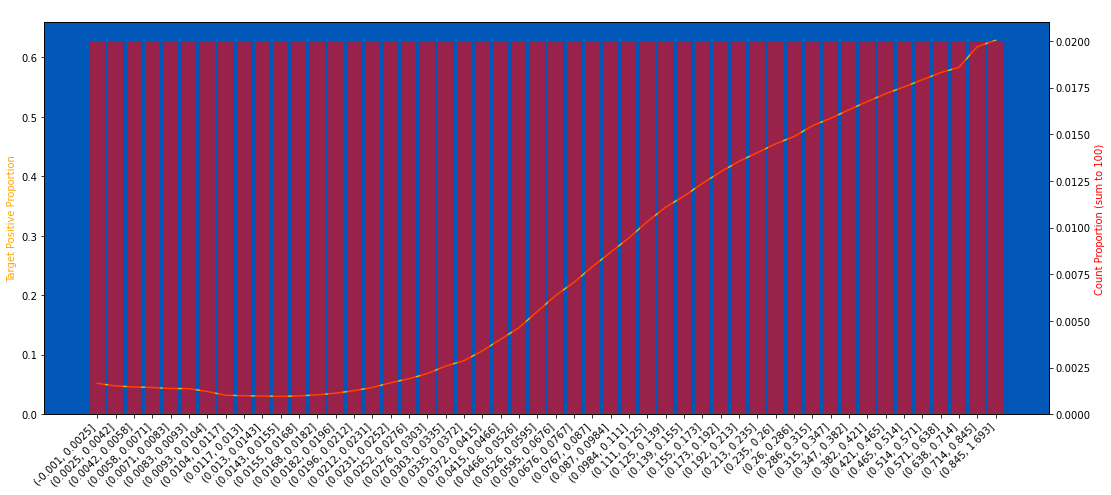

In [76]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True)

In [77]:
train["B_23"] = train["B_23"].round(3)
test["B_23"] = test["B_23"].round(3)

In [78]:
train.loc[train["B_23"].between(-1, 0.01), "B_23"] = 0.01
test.loc[test["B_23"].between(-1, 0.01), "B_23"] = 0.01

0 null count, 0.000 null proportion
nan of the targets have label = 1


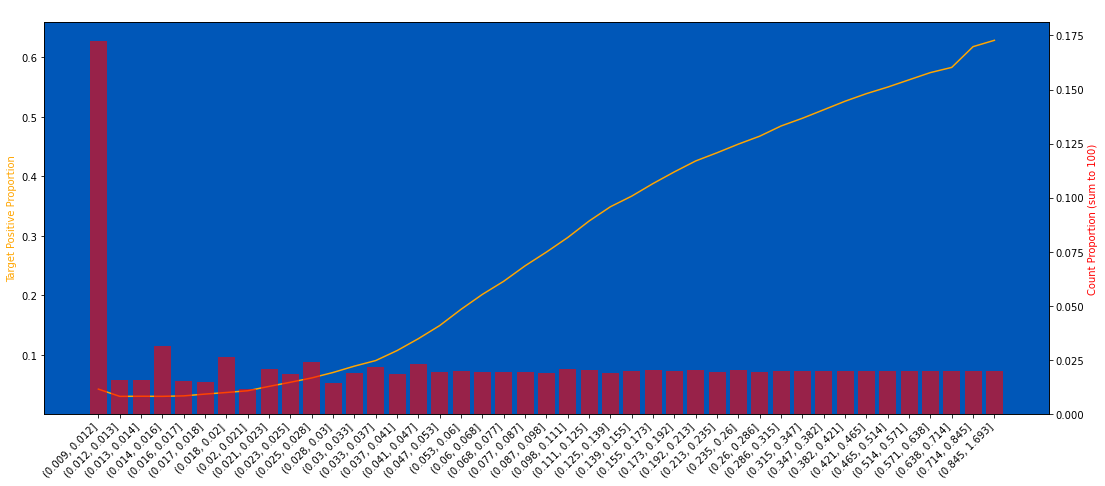

In [79]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True)

### B_24

0 null count, 0.000 null proportion
nan of the targets have label = 1


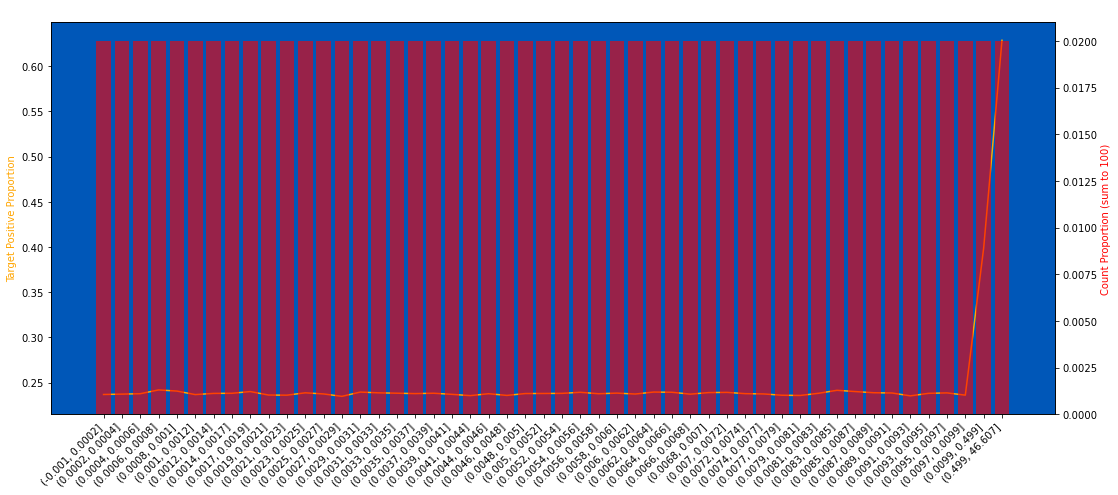

In [80]:
plot_target_check(train, "B_24", q=50, use_raw_bin=True)

In [81]:
train["B_24"] = train["B_24"].round(3)
test["B_24"] = test["B_24"].round(3)

In [82]:
train.loc[train["B_24"].between(-1, 0.01), "B_24"] = 0.01
test.loc[test["B_24"].between(-1, 0.01), "B_24"] = 0.01

0 null count, 0.000 null proportion
nan of the targets have label = 1


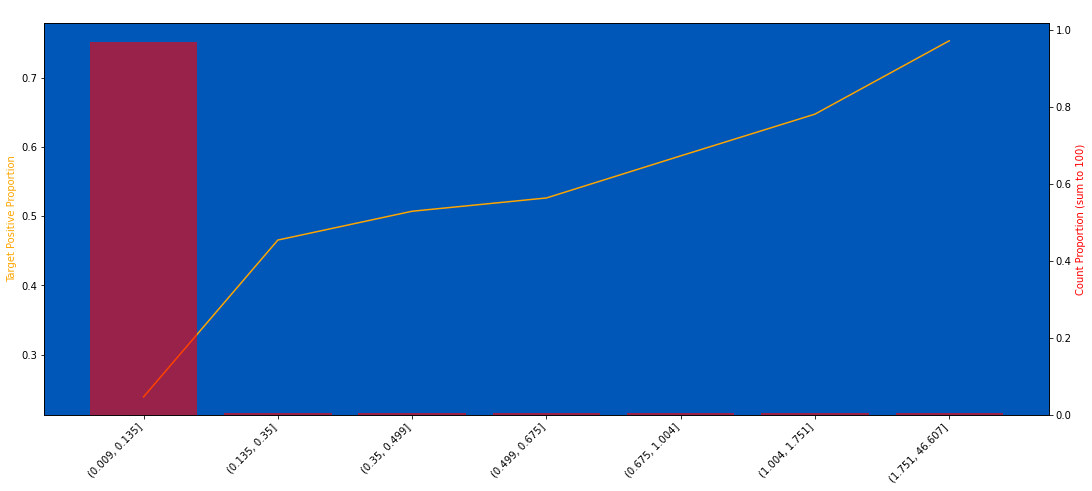

In [83]:
plot_target_check(train, "B_24", q=200, use_raw_bin=True)

### B_25

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


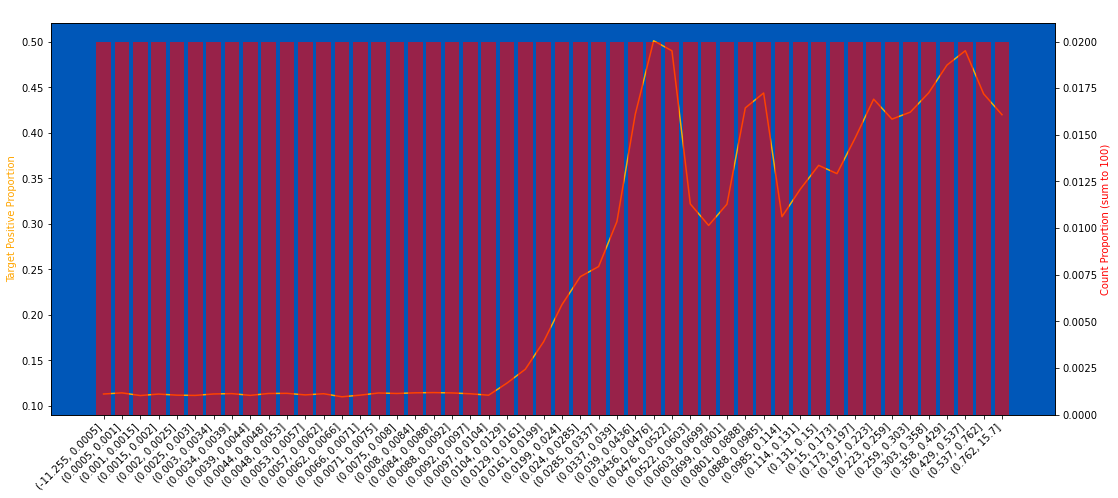

In [84]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True)

In [85]:
train["B_25"] = train["B_25"].round(3)
test["B_25"] = test["B_25"].round(3)

In [86]:
train.loc[train["B_25"].between(-0.001, 0.01), "B_25"] = 0.01
test.loc[test["B_25"].between(-0.001, 0.01), "B_25"] = 0.01

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


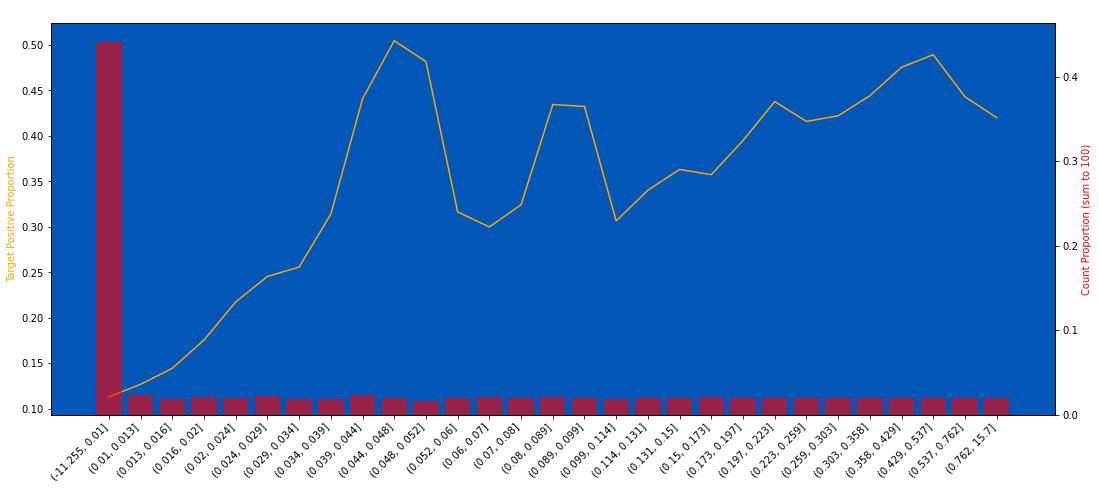

In [87]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True)

### B_26

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


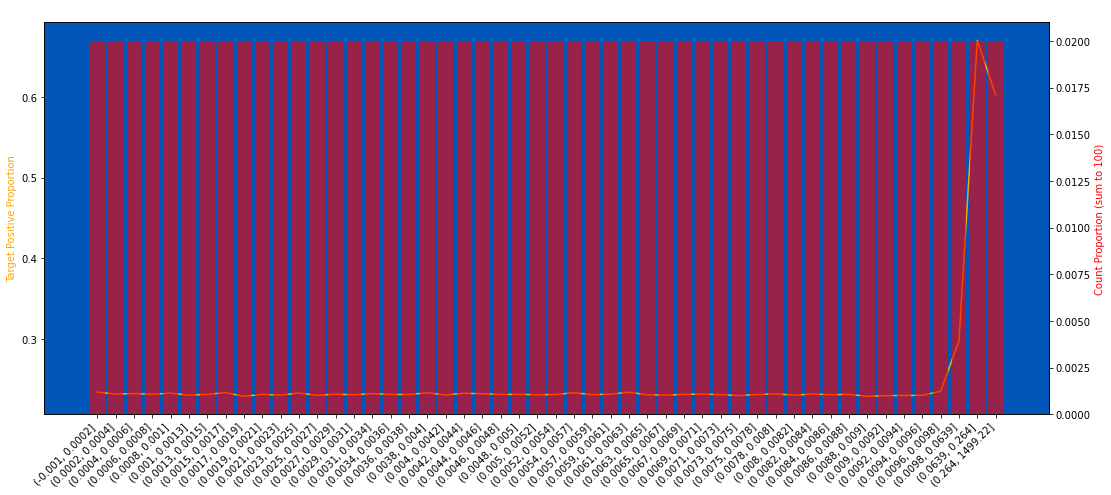

In [88]:
plot_target_check(train, "B_26", q=50, use_raw_bin=True)

In [89]:
train["B_26"] = train["B_26"].round(3)
test["B_26"] = test["B_26"].round(3)

In [90]:
train.loc[train["B_26"].between(-1, 0.01), "B_26"] = 0.01
test.loc[test["B_26"].between(-1, 0.01), "B_26"] = 0.01

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


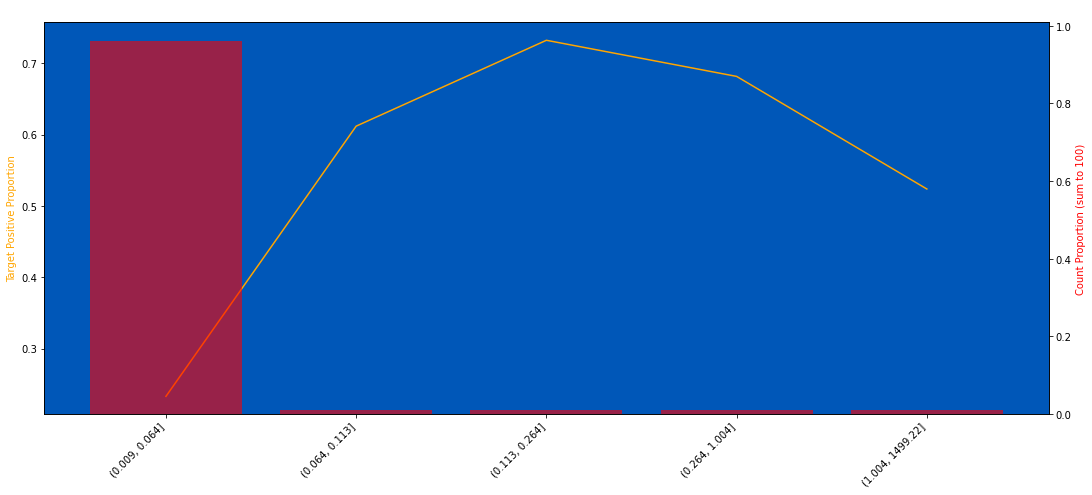

In [91]:
plot_target_check(train, "B_26", q=100, use_raw_bin=True)

### B_27

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


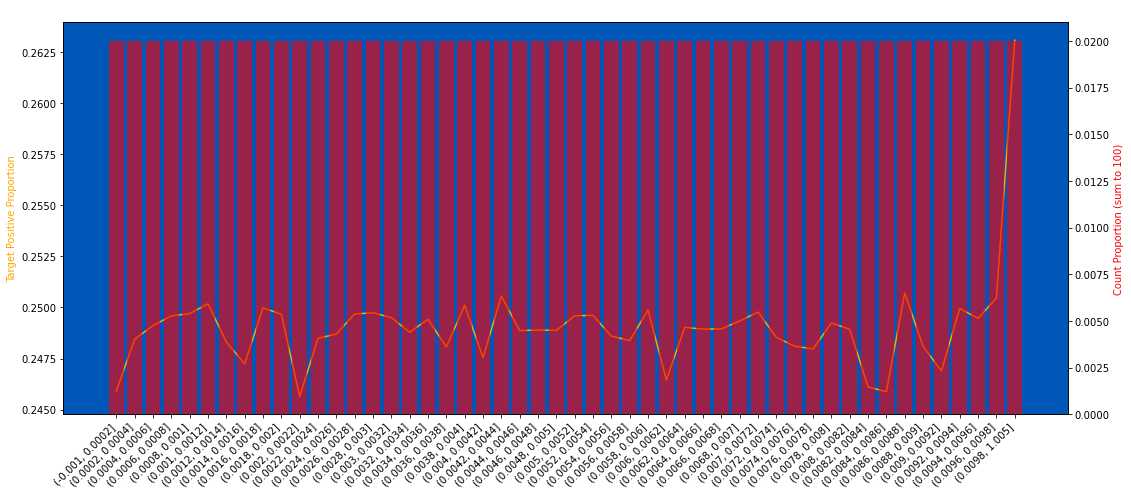

In [92]:
plot_target_check(train, "B_27", q=50, use_raw_bin=True)

In [93]:
train["B_27"] = train["B_27"].round(3)
test["B_27"] = test["B_27"].round(3)

In [94]:
train.loc[train["B_27"].between(-1, 0.01), "B_27"] = 0
test.loc[test["B_27"].between(-1, 0.01), "B_27"] = 0

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


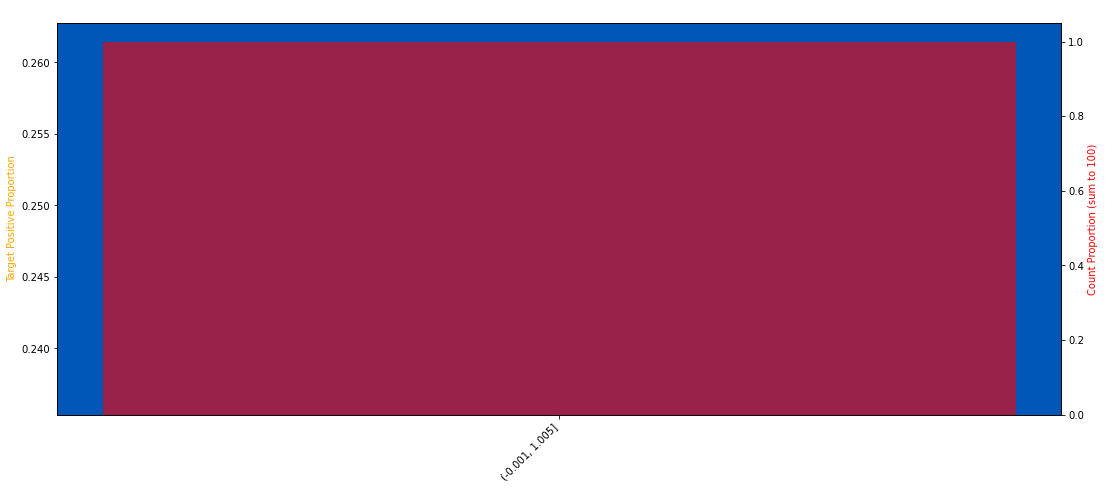

In [95]:
plot_target_check(train, "B_27", q=500, use_raw_bin=True)

In [96]:
%time
train = train.drop(columns="B_27", errors="ignore")
test = test.drop(columns="B_27", errors="ignore")

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


In [97]:
gc.collect()

19819

### B_28

0 null count, 0.000 null proportion
nan of the targets have label = 1


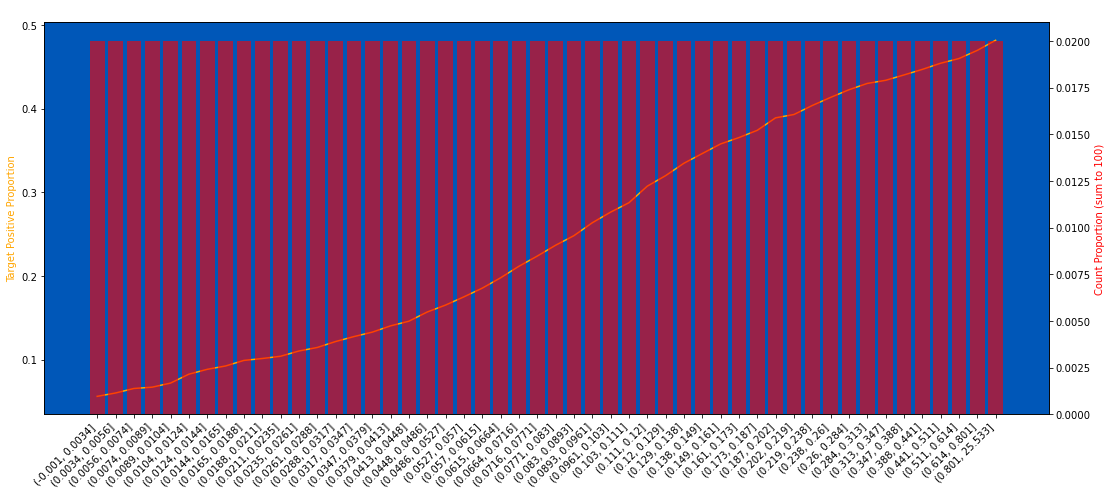

In [98]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True)

In [99]:
train["B_28"] = train["B_28"].round(3)
test["B_28"] = test["B_28"].round(3)

0 null count, 0.000 null proportion
nan of the targets have label = 1


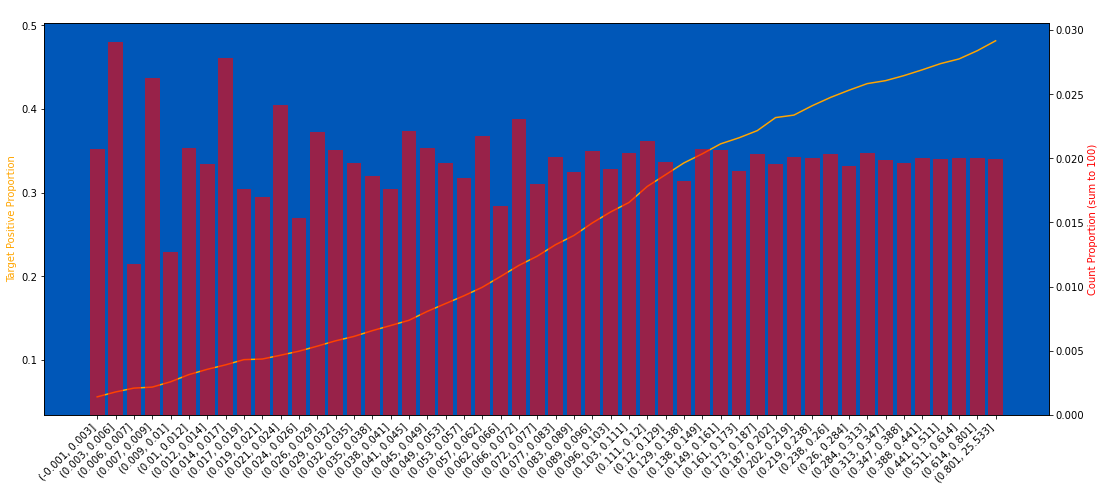

In [100]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True)

### B_29

5150035 null count, 0.931 null proportion
0.2512 of the targets have label = 1


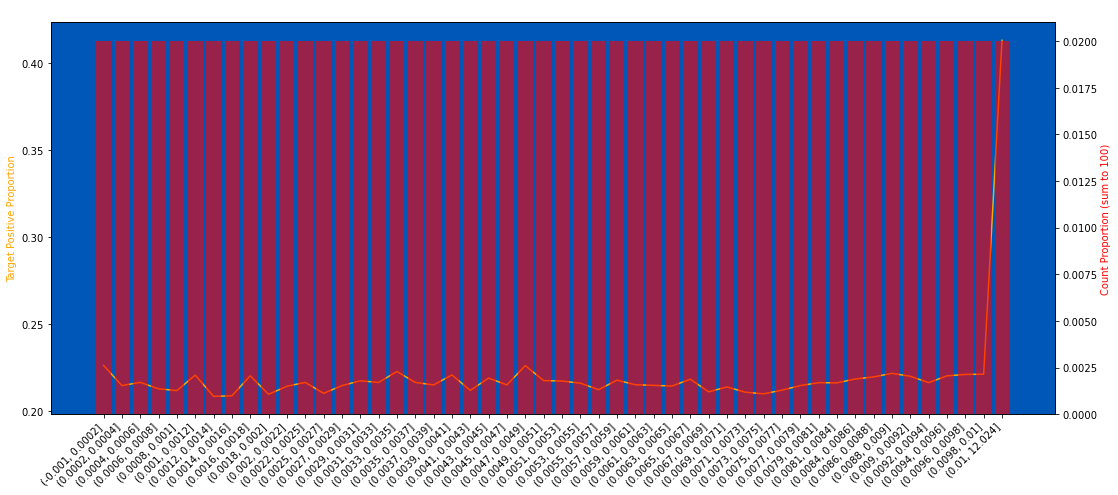

In [101]:
plot_target_check(train, "B_29", q=50, use_raw_bin=True)

In [102]:
train["B_29"] = train["B_29"].round(3)
test["B_29"] = test["B_29"].round(3)

In [103]:
train.loc[train["B_29"].between(-1, 0.01), "B_29"] = 0.01
test.loc[test["B_29"].between(-1, 0.01), "B_29"] = 0.01

5150035 null count, 0.931 null proportion
0.2512 of the targets have label = 1


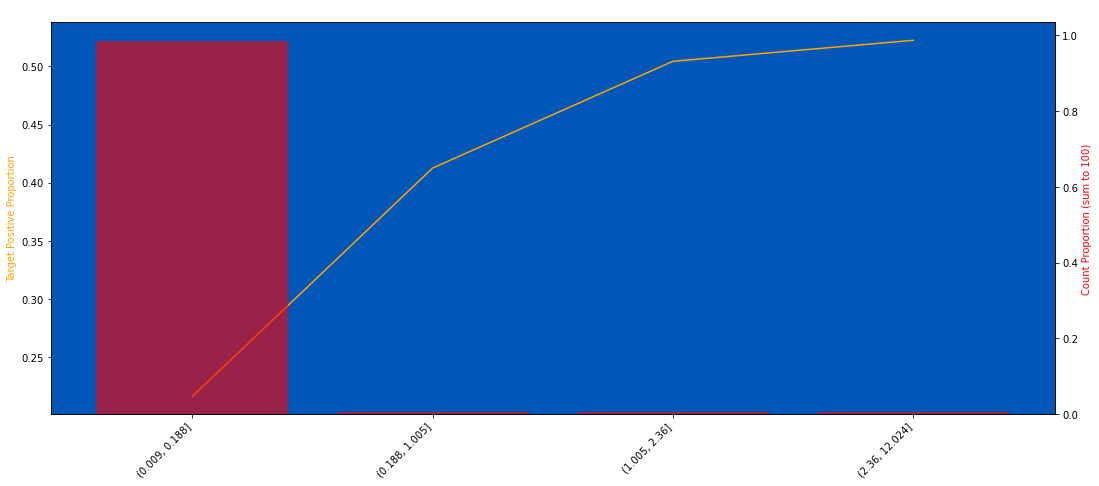

In [104]:
plot_target_check(train, "B_29", q=200, use_raw_bin=True)

### B_30

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


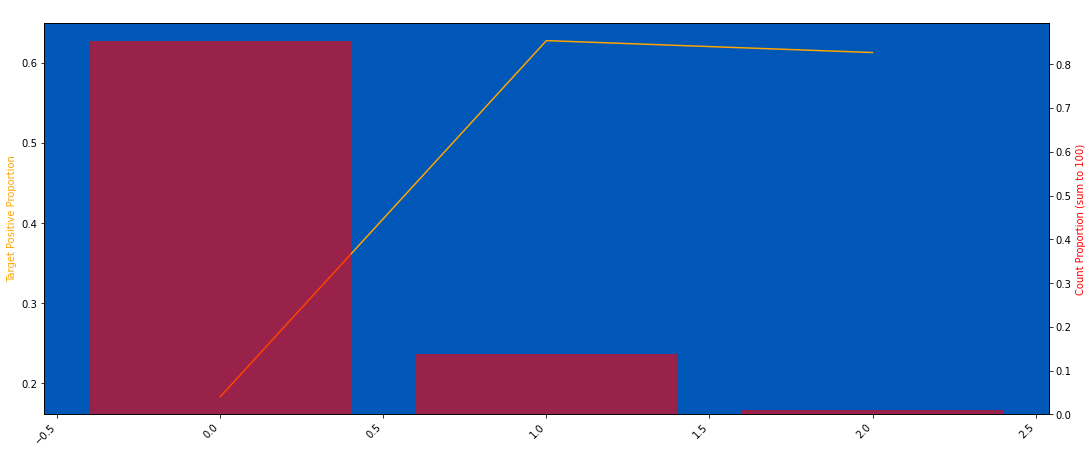

In [105]:
plot_target_check(train, "B_30", q=500, use_raw_bin=True)

### B_31

0 null count, 0.000 null proportion
nan of the targets have label = 1


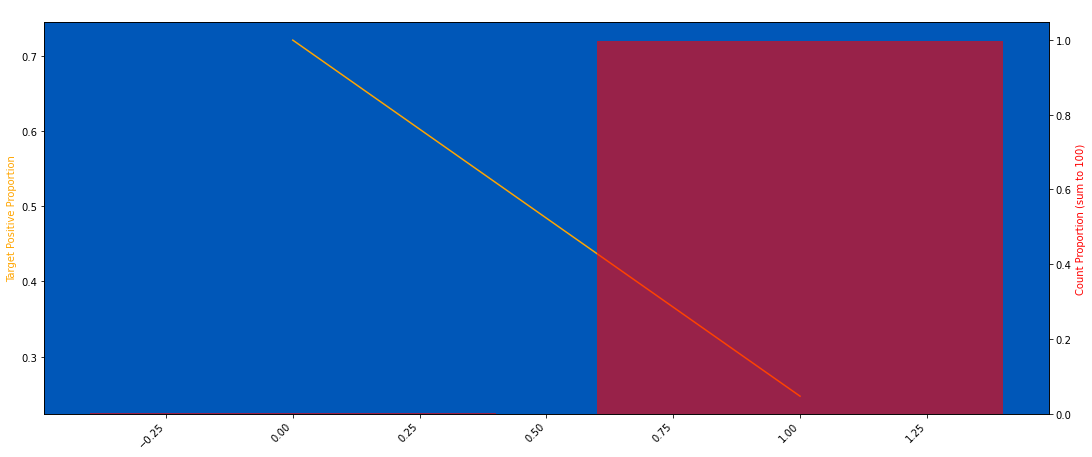

In [106]:
plot_target_check(train, "B_31", q=500, use_raw_bin=True)

### B_32

0 null count, 0.000 null proportion
nan of the targets have label = 1


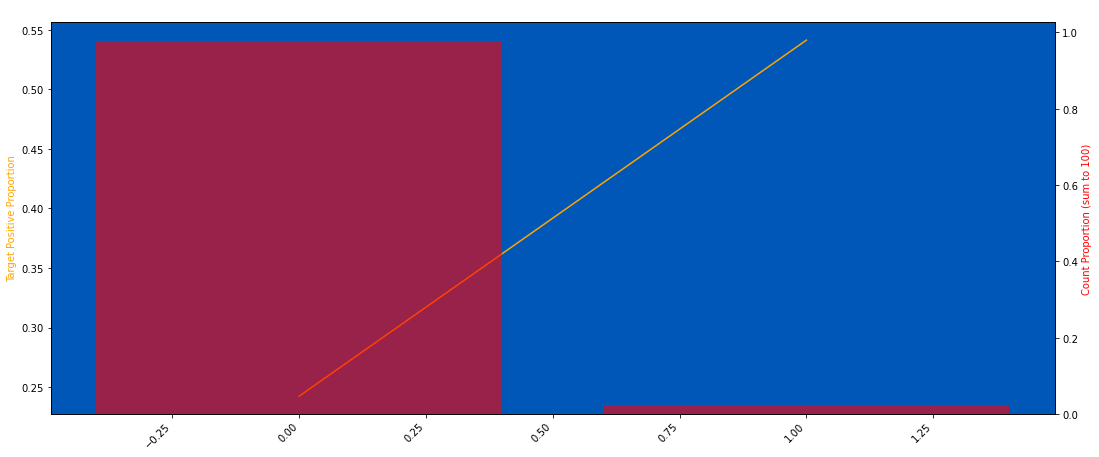

In [107]:
plot_target_check(train, "B_32", q=500, use_raw_bin=True)

### B_33

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


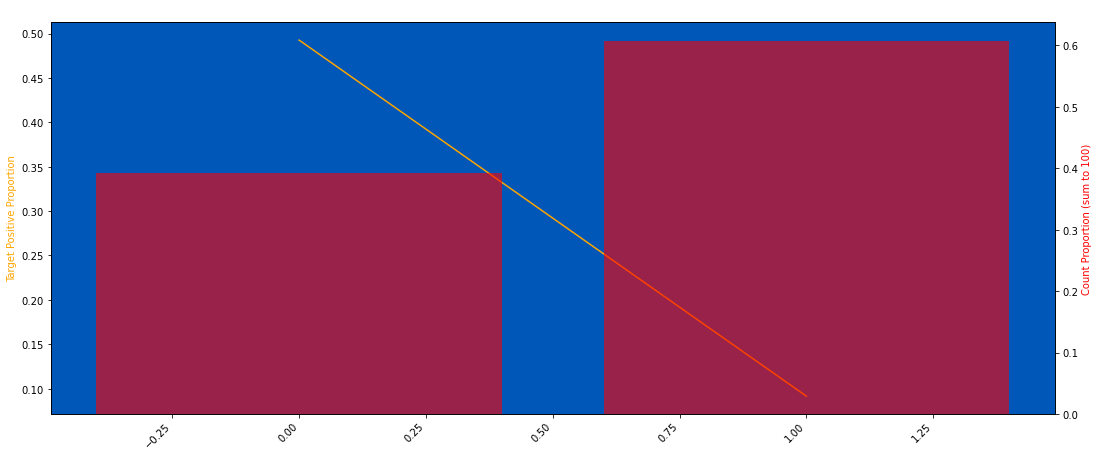

In [108]:
plot_target_check(train, "B_33", q=500, use_raw_bin=True)

### B_36

0 null count, 0.000 null proportion
nan of the targets have label = 1


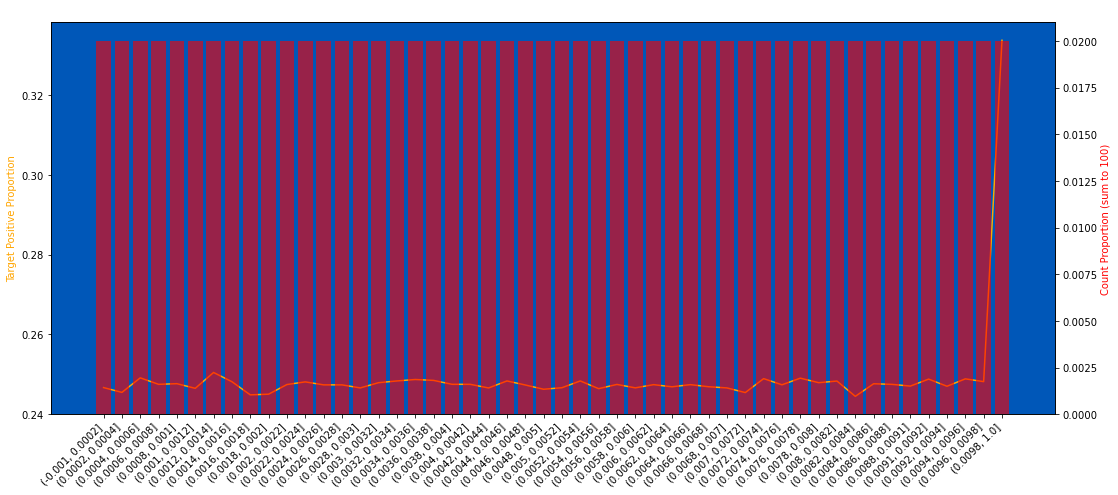

In [109]:
plot_target_check(train, "B_36", q=50, use_raw_bin=True)

In [110]:
train["B_36"] = train["B_36"].round(3)
test["B_36"] = test["B_36"].round(3)

In [111]:
%%time
train.loc[train["B_36"].between(-1, 0.01), "B_36"] = 0
test.loc[test["B_36"].between(-1, 0.01), "B_36"] = 0

CPU times: user 88.2 ms, sys: 88.7 ms, total: 177 ms
Wall time: 113 ms


0 null count, 0.000 null proportion
nan of the targets have label = 1


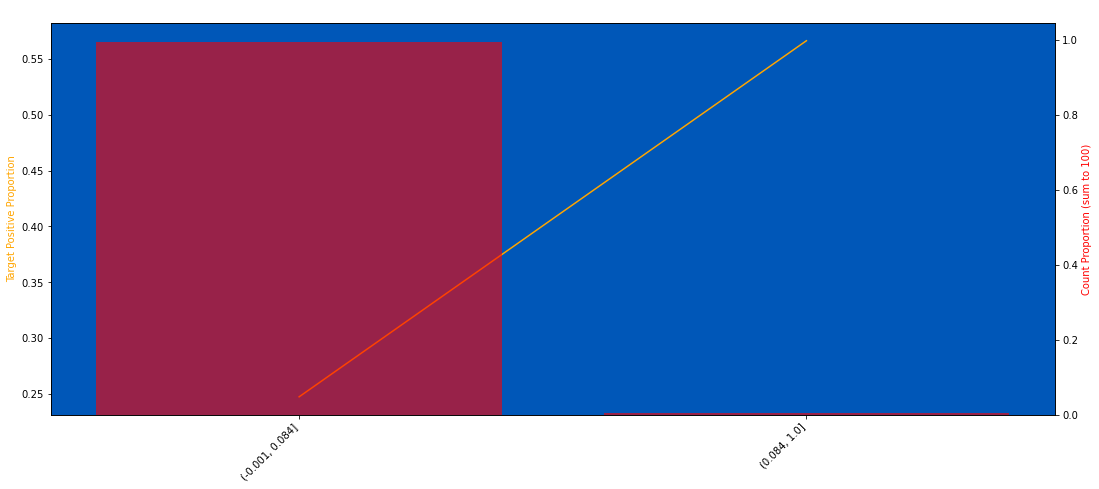

In [112]:
plot_target_check(train, "B_36", q=200, use_raw_bin=True)

### B_37

56 null count, 0.000 null proportion
0.1964 of the targets have label = 1


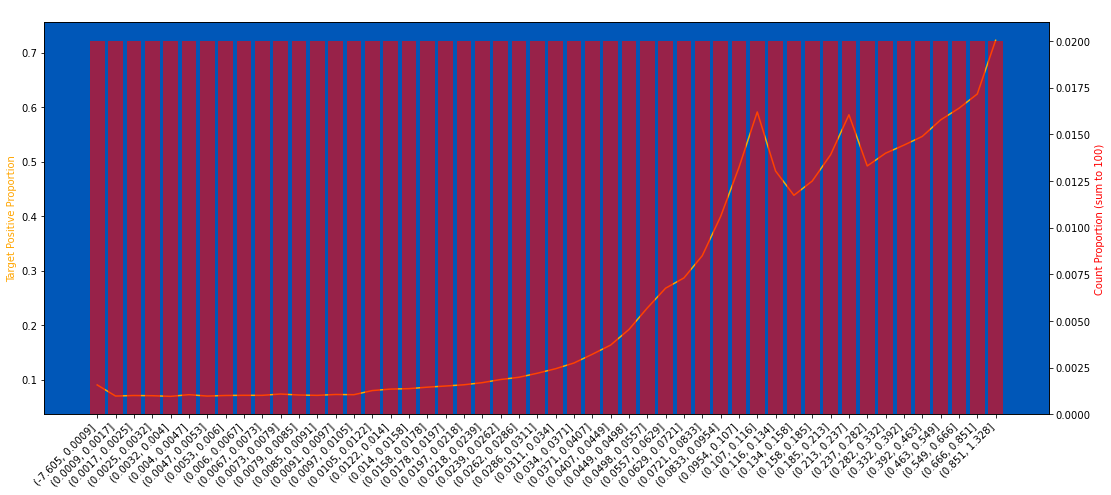

In [113]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True)

In [114]:
train["B_37"] = train["B_37"].round(2)
test["B_37"] = test["B_37"].round(2)

56 null count, 0.000 null proportion
0.1964 of the targets have label = 1


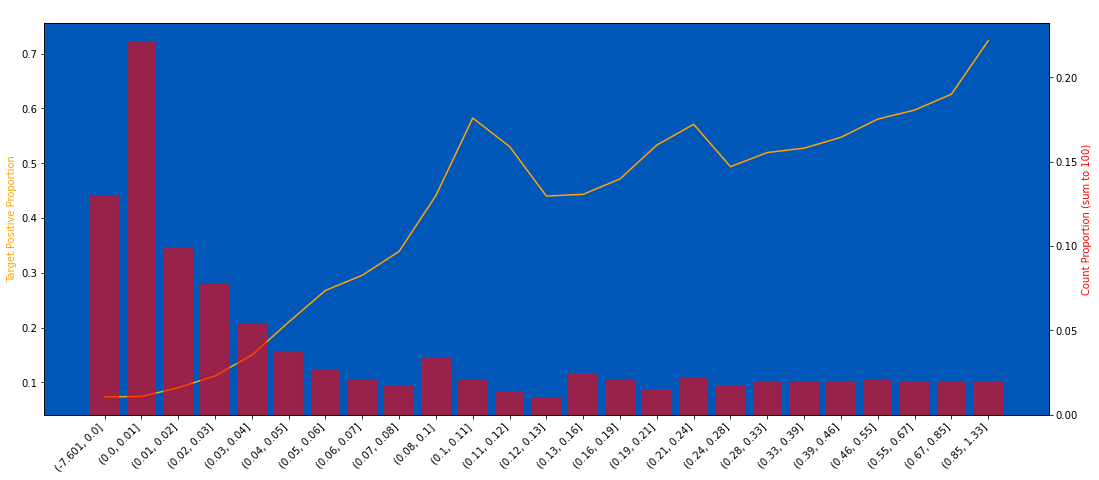

In [115]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True)

### B_38

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


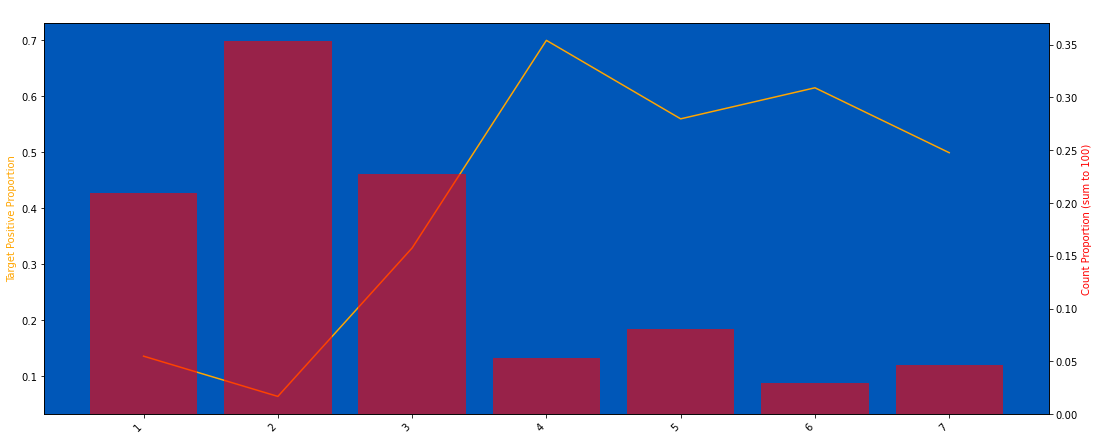

In [116]:
plot_target_check(train, "B_38", q=50, use_raw_bin=True)

### B_39

5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1


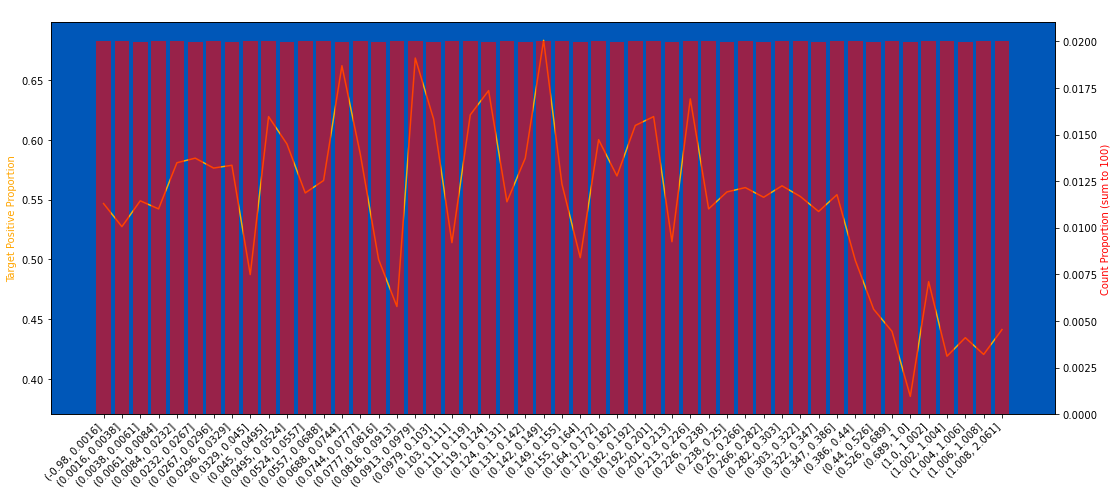

In [117]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True)

In [118]:
train["B_39"] = train["B_39"].round(2)
test["B_39"] = test["B_39"].round(2)

5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1


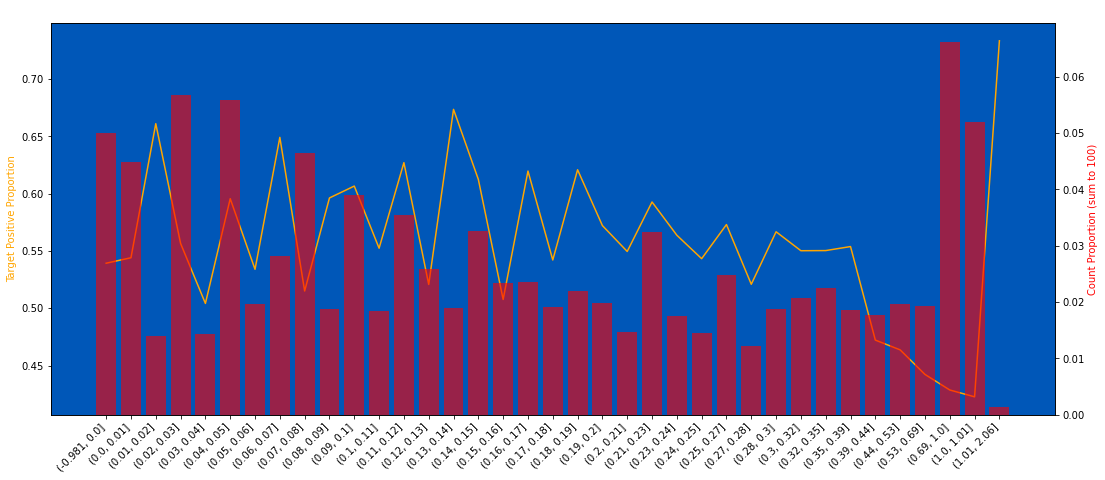

In [119]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True)

### B_40

53 null count, 0.000 null proportion
0.1698 of the targets have label = 1


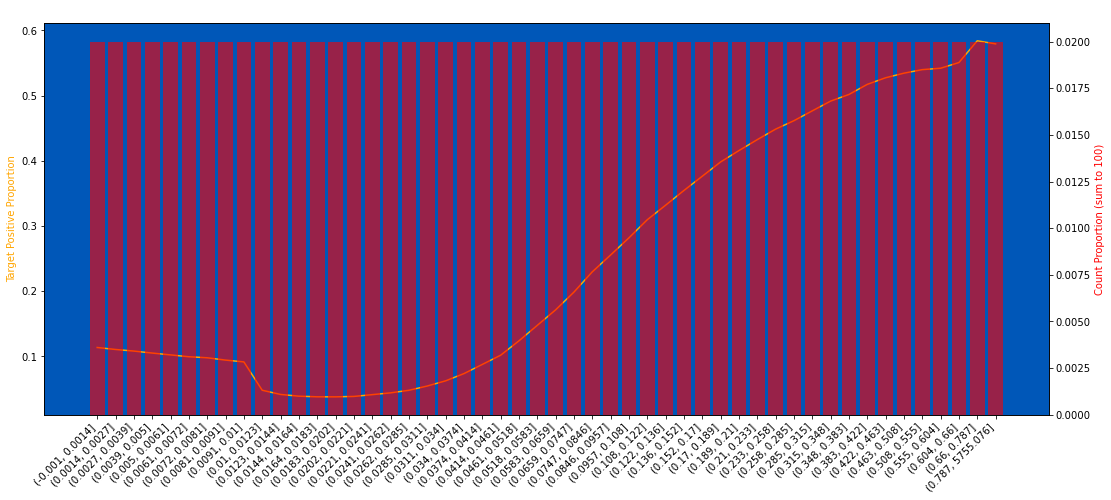

In [120]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

In [121]:
train["B_40"] = train["B_40"].round(2)
test["B_40"] = test["B_40"].round(2)

53 null count, 0.000 null proportion
0.1698 of the targets have label = 1


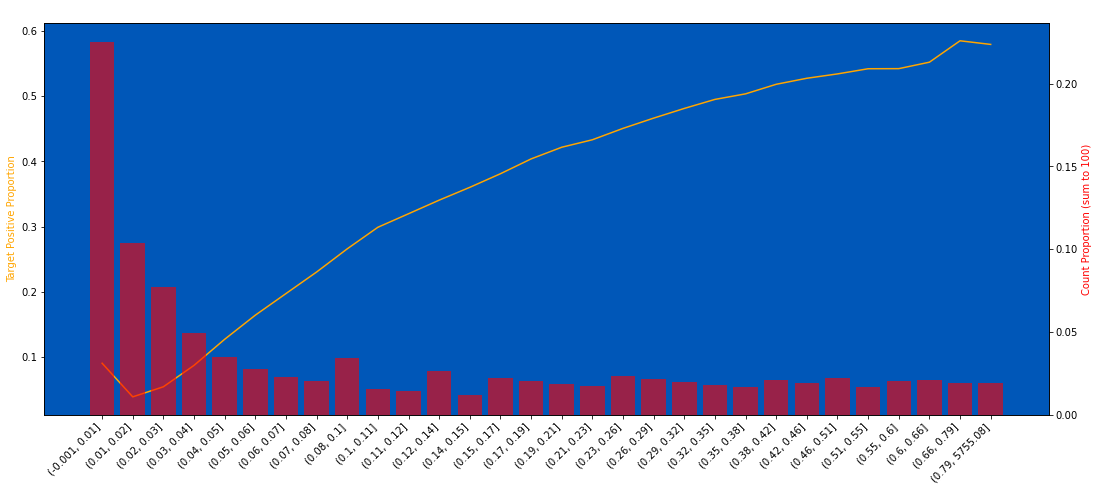

In [122]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

### B_41

690 null count, 0.000 null proportion
0.1420 of the targets have label = 1


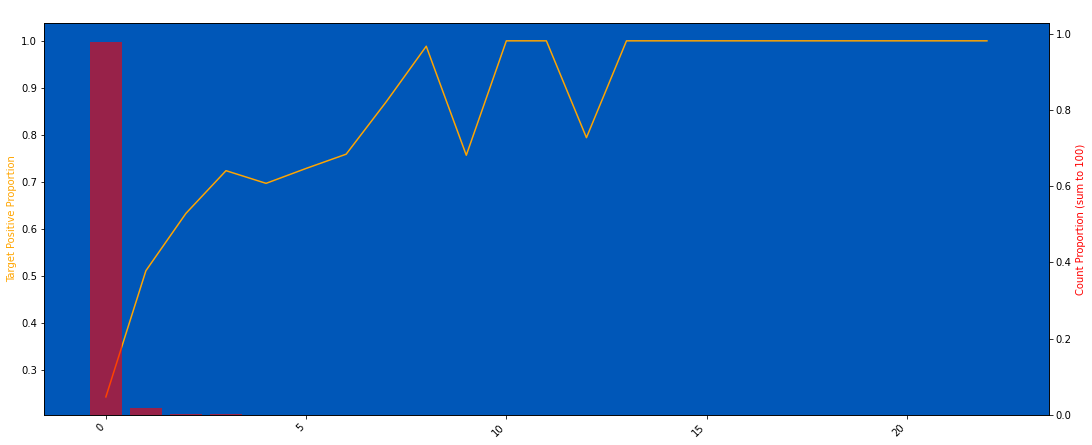

In [123]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True)

In [124]:
train.loc[train["B_41"].between(4, 100), "B_41"] = 4
test.loc[test["B_41"].between(4, 100), "B_41"] = 4

690 null count, 0.000 null proportion
0.1420 of the targets have label = 1


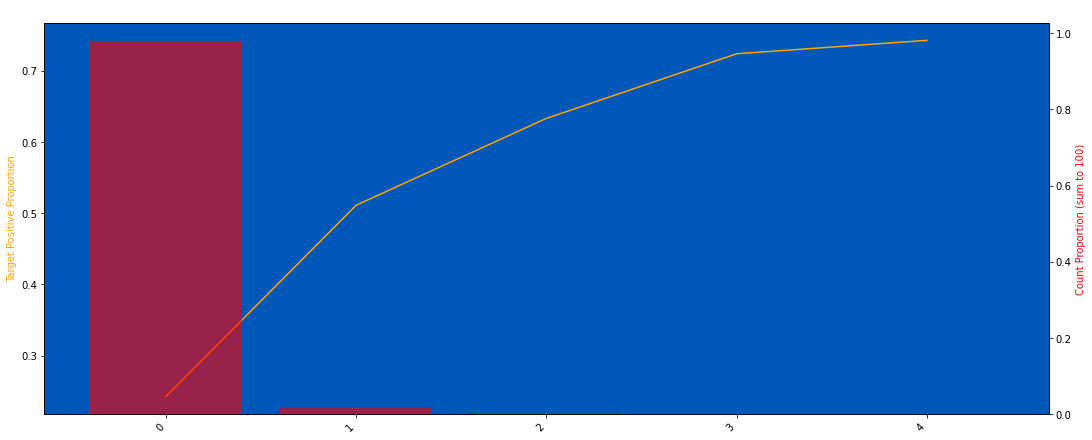

In [125]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True)

### B_42

5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


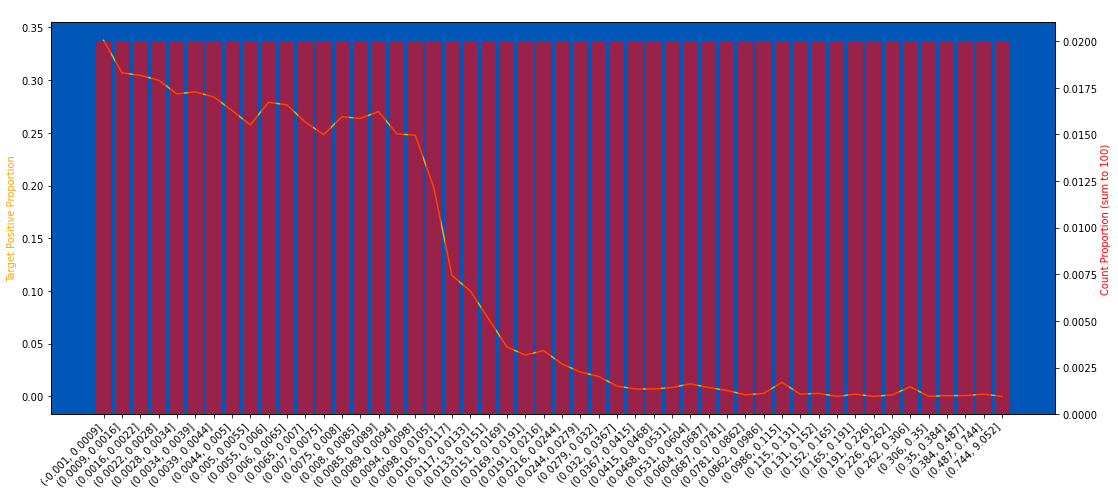

In [126]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True)

In [127]:
train["B_42"] = train["B_42"].round(2)
test["B_42"] = test["B_42"].round(2)

5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


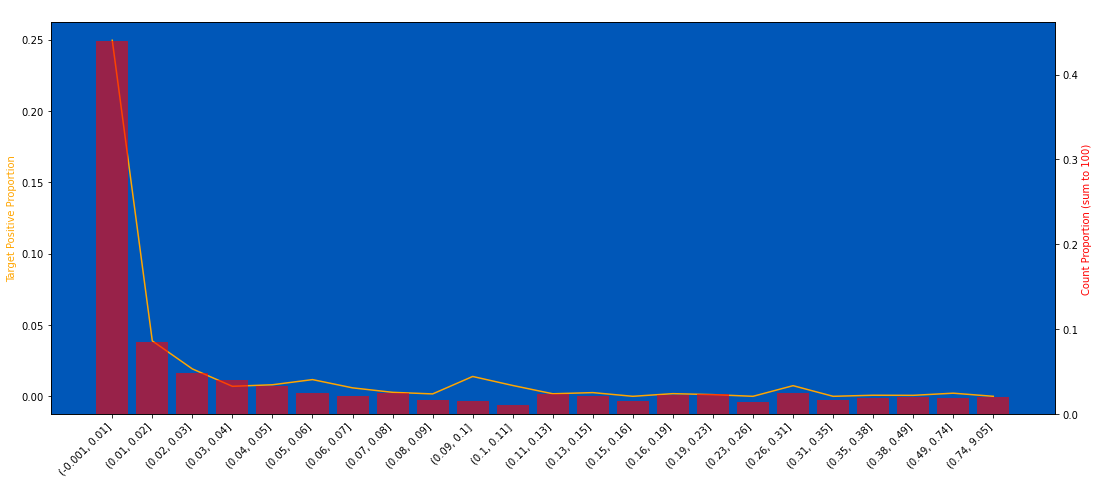

In [128]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True)

In [129]:
train = train.drop(columns=["temp"], errors="ignore")
test = test.drop(columns=["temp"], errors="ignore")

### Column checking

In [144]:
b_columns = get_cols(train, "B_")

In [149]:
for b in tqdm(b_columns):
    neg1_series = train.loc[train[b] == -1, b]
    if len(neg1_series) > 0:
        print("Train", b, len(neg1_series))
    neg1_series = test.loc[test[b] == -1, b]
    if len(neg1_series) > 0:
        print("Test", b, len(neg1_series))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 22.60it/s]


In [151]:
b_col_nunique = train[b_columns].nunique()

In [170]:
less_unique_b_cols = b_col_nunique[b_col_nunique < 50].index.tolist()

In [171]:
for b in less_unique_b_cols:
    print(b, ":", train[b].dtype, "\n", sorted(train[b].unique().tolist()), "\n")

B_8 : int16 
 [-1, 0, 1] 

B_16 : int16 
 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 

B_19 : int16 
 [-1, 0, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 25, 27, 28, 30, 33, 36, 37, 40, 41, 42, 44, 45, 50, 54, 55, 57, 58, 60, 62, 63, 66, 70, 71, 72, 75, 77, 80, 81, 83, 85, 87, 88, 90, 91, 100] 

B_20 : int16 
 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 

B_22 : int16 
 [-1, 0, 1, 2, 3, 4, 5, 6, 7] 

B_30 : int16 
 [-1, 0, 1, 2] 

B_31 : int16 
 [0, 1] 

B_32 : int16 
 [0, 1] 

B_33 : int16 
 [-1, 0, 1] 

B_38 : int16 
 [-1, 1, 2, 3, 4, 5, 6, 7] 

B_41 : int16 
 [-1, 0, 1, 2, 3, 4] 



In [166]:
for col in tqdm(less_unique_b_cols):
    train[col] = integerize(train[col])
    test[col] = integerize(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:26<00:00,  2.38s/it]


In [172]:
%%time
train.to_parquet(f"{RAW_TRAIN_PARQUET_PATH}/train_b.parquet")
test.to_parquet(f"{RAW_TEST_PARQUET_PATH}/test_b.parquet")

CPU times: user 45.4 s, sys: 10.3 s, total: 55.7 s
Wall time: 52.5 s


### Insert row_number

In [ ]:
%%time
insert_row_number(train)
insert_row_number(test)

In [ ]:
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

In [ ]:
train.shape, test.shape

### Export data out

In [ ]:
%%time
train.to_pickle(f"{RAW_TRAIN_PICKLE_PATH}/raw_train_data.pkl")
test.to_pickle(f"{RAW_TEST_PICKLE_PATH}/raw_test_data.pkl")